In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv('C:\\Users\\bista_000\\Desktop\\file\\zomato.csv',encoding='latin-1')

In [3]:
data.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


In [4]:
data.shape

(9551, 21)

In [5]:
data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [7]:
df_country=pd.read_excel('C:\\Users\\bista_000\\Desktop\\file\\country-code.xlsx')
df_country.head(2)

,Country Code,Country
0,1,India
1,14,Australia


###### merge the zomato data with country name based on Country code

In [8]:
df=pd.merge(data,df_country,on='Country Code',how='left')

In [9]:
df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


### Data Cleaning

In [10]:
df.drop(['Restaurant ID','Address','Locality Verbose', 'Longitude', 'Latitude'],axis=1,inplace=True)

In [11]:
df.head(2)

,Restaurant Name,Country Code,City,Locality,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,Le Petit Souffle,162,Makati City,"Century City Mall, Poblacion, Makati City","French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,Izakaya Kikufuji,162,Makati City,"Little Tokyo, Legaspi Village, Makati City",Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


In [12]:
df.duplicated().value_counts()

False    9548
True        3
Name: count, dtype: int64

In [13]:
df.drop_duplicates(inplace= True)

In [14]:
df.duplicated().value_counts()

False    9548
Name: count, dtype: int64

In [15]:
df.shape

(9548, 17)

### Statistical analysis

In [16]:
df.describe(include=int)

,Country Code,Average Cost for two,Price range,Votes
count,9548.000000,9548.000000,9548.000000,9548.000000
mean,18.371072,1199.456640,1.804985,156.958944
std,56.758626,16123.709656,0.905674,430.227771
min,1.000000,0.000000,1.000000,0.000000
25%,1.000000,250.000000,1.000000,5.000000
50%,1.000000,400.000000,2.000000,31.000000
75%,1.000000,700.000000,2.000000,131.000000
max,216.000000,800000.000000,4.000000,10934.000000


In [17]:
df.describe(include=object)

,Restaurant Name,City,Locality,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Rating color,Rating text,Country
count,9548,9548,9548,9539,9548,9548,9548,9548,9548,9548,9548,9548
unique,7446,141,1208,1825,12,2,2,2,1,6,6,15
top,Cafe Coffee Day,New Delhi,Connaught Place,North Indian,Indian Rupees(Rs.),No,No,No,No,Orange,Average,India
freq,83,5471,122,935,8649,8390,7097,9514,9548,3737,3737,8649


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9548 entries, 0 to 9550
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant Name       9548 non-null   object 
 1   Country Code          9548 non-null   int64  
 2   City                  9548 non-null   object 
 3   Locality              9548 non-null   object 
 4   Cuisines              9539 non-null   object 
 5   Average Cost for two  9548 non-null   int64  
 6   Currency              9548 non-null   object 
 7   Has Table booking     9548 non-null   object 
 8   Has Online delivery   9548 non-null   object 
 9   Is delivering now     9548 non-null   object 
 10  Switch to order menu  9548 non-null   object 
 11  Price range           9548 non-null   int64  
 12  Aggregate rating      9548 non-null   float64
 13  Rating color          9548 non-null   object 
 14  Rating text           9548 non-null   object 
 15  Votes                 9548

### handling Missing values

In [19]:
df.isnull().sum()

Restaurant Name         0
Country Code            0
City                    0
Locality                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [20]:
df['Cuisines'].fillna('Missing', inplace=True)

In [21]:
df.isnull().sum()

Restaurant Name         0
Country Code            0
City                    0
Locality                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [22]:
categorical_feature=[feature for feature in df.columns if df[feature].dtypes=='O']

In [23]:
categorical_feature

['Restaurant Name',
 'City',
 'Locality',
 'Cuisines',
 'Currency',
 'Has Table booking',
 'Has Online delivery',
 'Is delivering now',
 'Switch to order menu',
 'Rating color',
 'Rating text',
 'Country']

In [24]:
numerical_feature=[feature for feature in df.columns if df[feature].dtypes!='O']

In [25]:
numerical_feature

['Country Code',
 'Average Cost for two',
 'Price range',
 'Aggregate rating',
 'Votes']

### Data Visualization

In [26]:
top_values = {
    'Country': 3,
    'Restaurant Name':10,
    'City': 5,
    'Cuisines': 10,
}

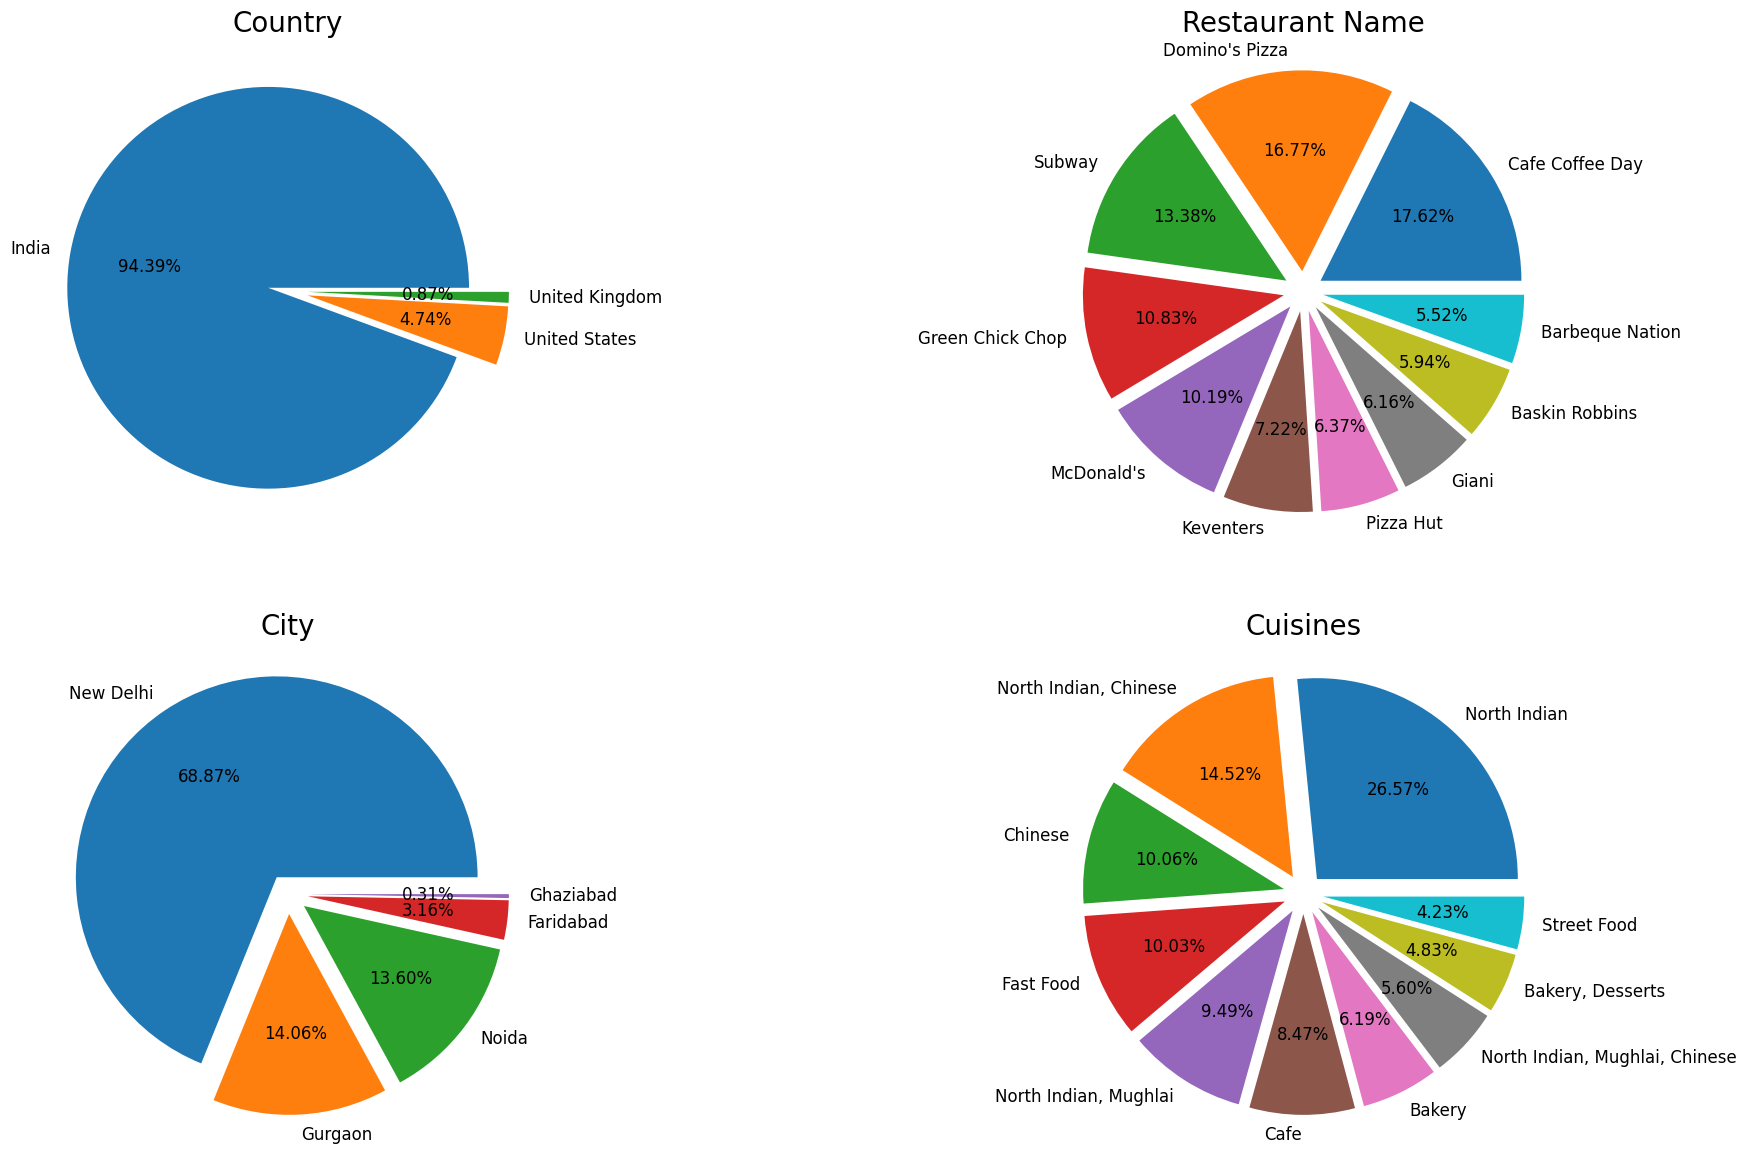

In [27]:
plt.figure(figsize=(20, 30))
for i, col_name in enumerate(categorical_feature[11:12] + categorical_feature[0:2]+categorical_feature[3:4]):
    plt.subplot(len(categorical_feature[11:12] + categorical_feature[0:2]+categorical_feature[3:4]), 2, i + 1)
    top = top_values.get(col_name, 4)  # Default to 4 if feature not found in top_values
    plt.pie(df[col_name].value_counts().values[:top], labels=df[col_name].value_counts().index[:top], autopct='%1.2f%%',explode=(0.1,) * top,textprops={'fontsize': 12})
    plt.title(f"{col_name}",fontsize=20)
    plt.subplots_adjust(wspace=0.9)

#### Title Country: Zomato has maximum Transaction in India followed by United States and United Kingdom.
#### Title Restaurant: Zomato pursue  maximum delivery from Cafe Coffee Day which is in top 10 Restaurant.
#### Title City: Zomato has maximum Transaction in India, particularly at New Delhi, followed by Gurgaon , Noida etc.
#### Title Cuisines: There are best selling Cuisines in Zomato. 

In [28]:
df.groupby(['Country','Has Online delivery']).size()

Country         Has Online delivery
Australia       No                       24
Brazil          No                       60
Canada          No                        4
India           No                     6226
                Yes                    2423
Indonesia       No                       21
New Zealand     No                       40
Phillipines     No                       22
Qatar           No                       20
Singapore       No                       20
South Africa    No                       60
Sri Lanka       No                       20
Turkey          No                       34
UAE             No                       32
                Yes                      28
United Kingdom  No                       80
United States   No                      434
dtype: int64

Text(0.5, 1.0, 'Has or Has not Online Delivery by Country')

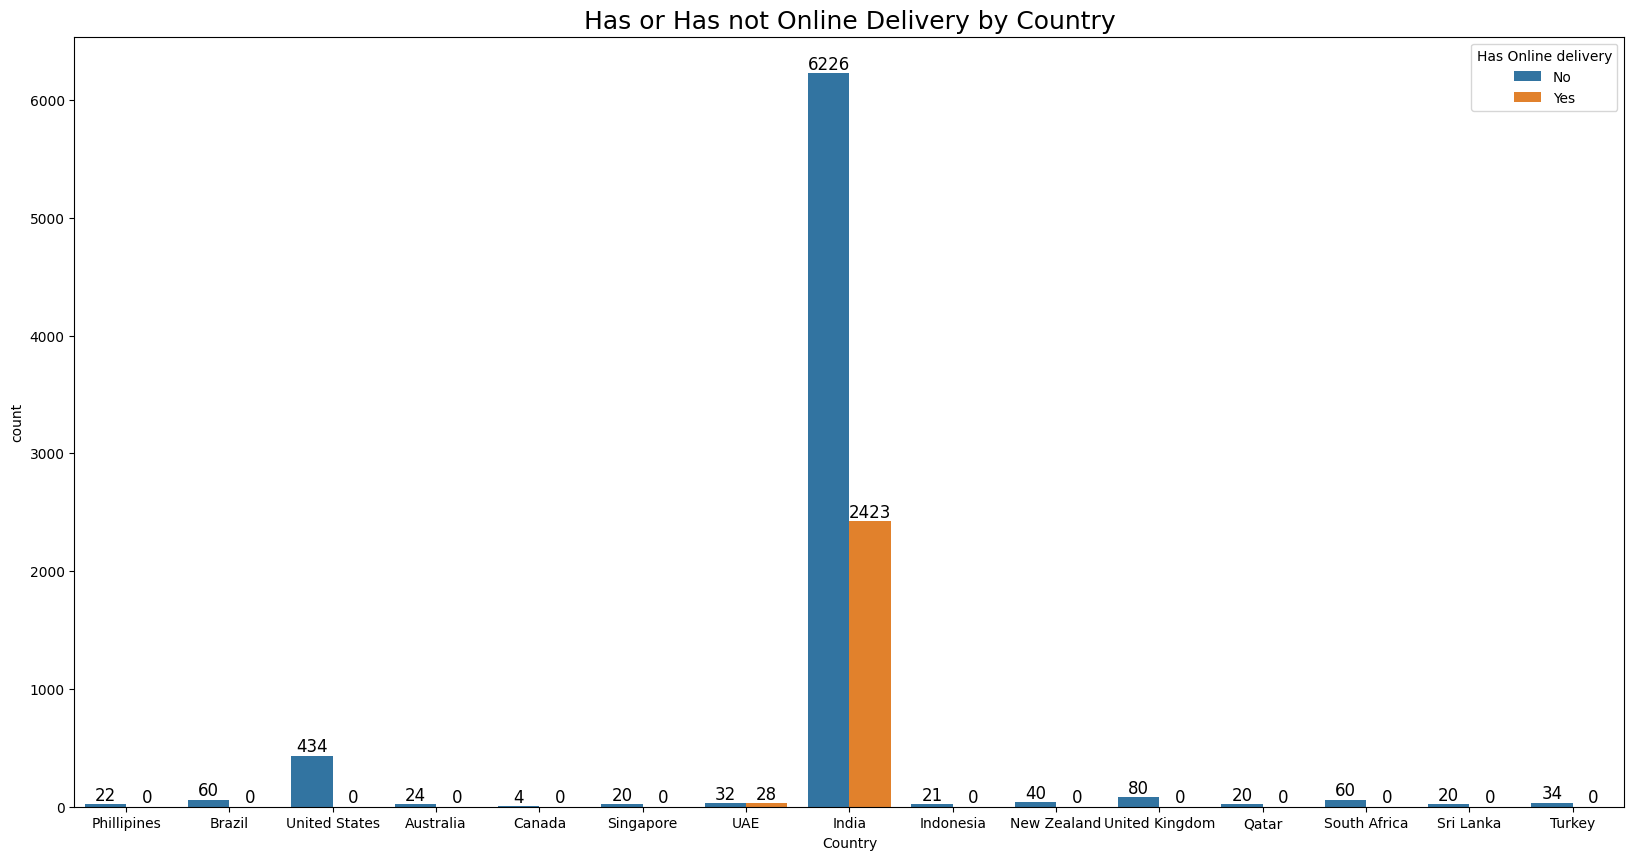

In [29]:
plt.figure(figsize=(20,10))
sns.countplot(data=df,x='Country',hue='Has Online delivery')
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{int(height)}", (p.get_x() + p.get_width() / 2, height),ha='center', va='bottom', fontsize=12, color='black')
plt.title("Has or Has not Online Delivery by Country", fontsize= 18)

#### Zomato has online delivery in India and UAE only. 

Text(0, 0.5, 'Count')

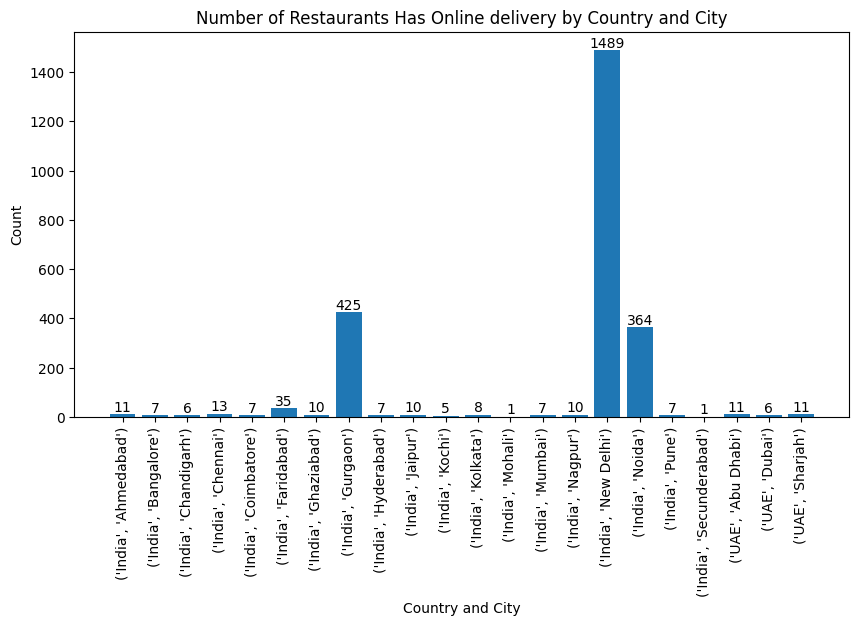

In [30]:
grouped_data_online_delivery=df[df['Has Online delivery']== 'Yes'].groupby(['Country', 'City']).size()

# Plot the grouped data
plt.figure(figsize=(10, 5)) 
bars = plt.bar(range(len(grouped_data_online_delivery)), grouped_data_online_delivery.values)

# Add annotations on top of each bar
for i, bar in enumerate(bars):
    plt.text(bar.get_x()+ bar.get_width()/2, bar.get_height(), grouped_data_online_delivery.values[i], ha='center', va='bottom',
            color='black')
plt.xticks(range(len(grouped_data_online_delivery)), grouped_data_online_delivery.index, rotation=90)
plt.title('Number of Restaurants Has Online delivery by Country and City')
plt.xlabel('Country and City')
plt.ylabel('Count')

###### Maximum Number of restaurant has online delivery shown at new delhi in India, followed by Gurgaon and Noida in india.

In [31]:
df.groupby(['Country','Has Table booking']).size()

Country         Has Table booking
Australia       No                     24
Brazil          No                     60
Canada          No                      4
India           No                   7538
                Yes                  1111
Indonesia       No                     21
New Zealand     No                     40
Phillipines     No                      8
                Yes                    14
Qatar           No                     19
                Yes                     1
Singapore       No                     20
South Africa    No                     58
                Yes                     2
Sri Lanka       No                     20
Turkey          No                     34
UAE             No                     42
                Yes                    18
United Kingdom  No                     68
                Yes                    12
United States   No                    434
dtype: int64

Text(0.5, 1.0, 'Has or has not table booking by Country')

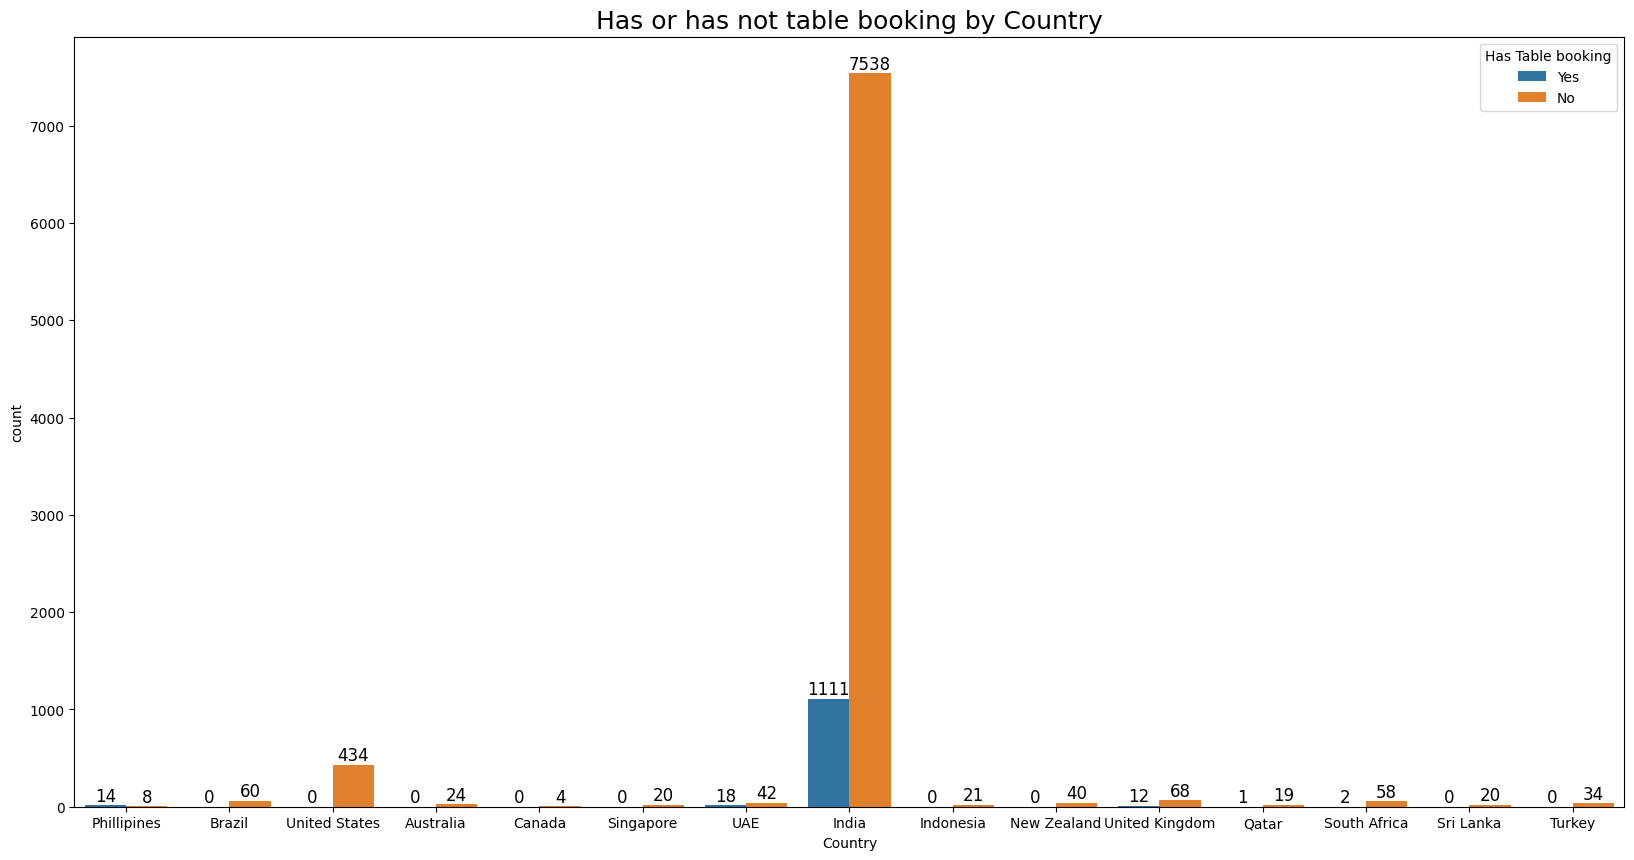

In [32]:
plt.figure(figsize=(20,10))
sns.countplot(data=df,x='Country',hue='Has Table booking')
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{int(height)}", (p.get_x() + p.get_width() / 2, height),ha='center', va='bottom', fontsize=12, color='black')
plt.title("Has or has not table booking by Country", fontsize=18)

Text(0, 0.5, 'Count')

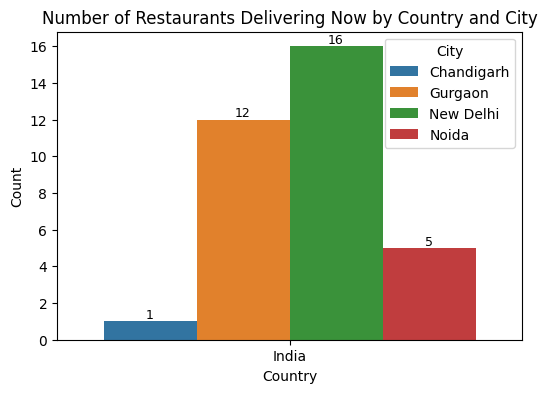

In [33]:
filtered_df = df[df['Is delivering now'] == 'Yes']

plt.figure(figsize=(6, 4)) 
sns.countplot(data=filtered_df, x='Country', hue='City')

# Add annotations on top of each bar
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{int(height)}", (p.get_x() + p.get_width() / 2, height),ha='center', va='bottom', fontsize=9, color='black')
# Set the title and labels for the plot
plt.title('Number of Restaurants Delivering Now by Country and City')
plt.xlabel('Country')
plt.ylabel('Count')

In [34]:
Rating=df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating count'})

In [35]:
Rating.head(5)

,Aggregate rating,Rating color,Rating text,Rating count
0,0.0,White,Not rated,2145
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15


In [36]:
Rating['Rating color'].unique()

array(['White', 'Red', 'Orange', 'Yellow', 'Green', 'Dark Green'],
      dtype=object)

<Axes: xlabel='Rating color', ylabel='count'>

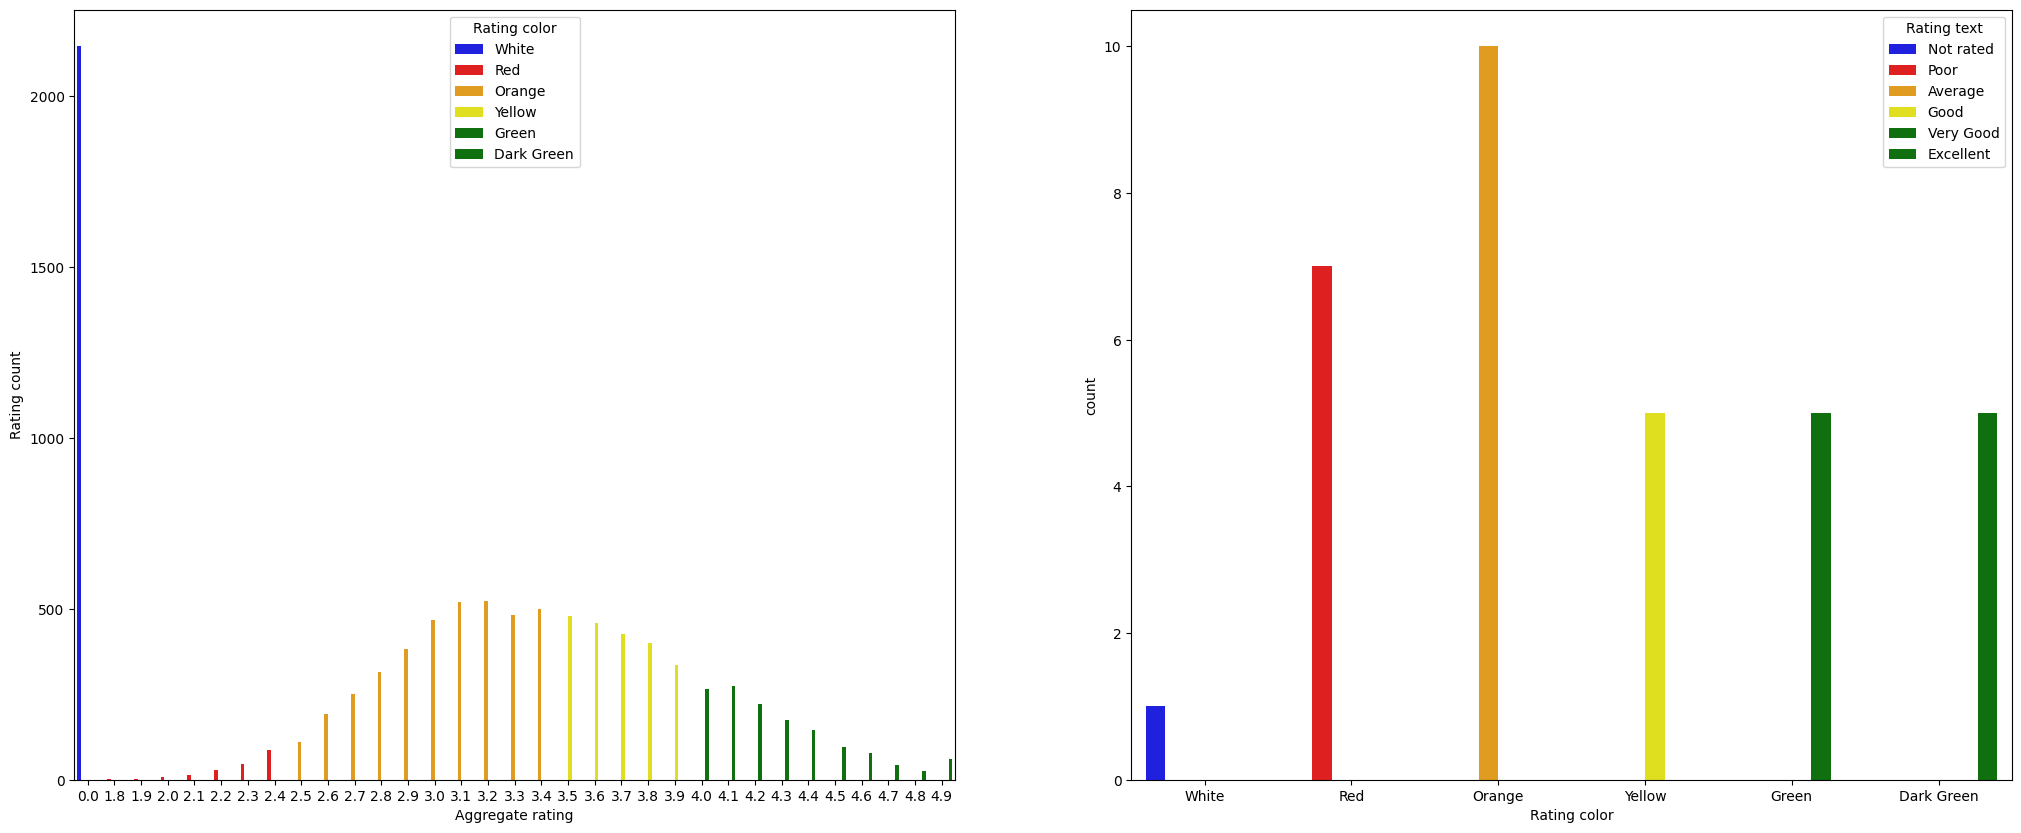

In [37]:
plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
sns.barplot(data=Rating,x='Aggregate rating', y='Rating count', hue='Rating color',palette=['blue','red','orange','yellow','green','green'])
plt.subplot(1,2,2)
sns.countplot(data=Rating,x='Rating color', hue='Rating text',palette=['blue','red','orange','yellow','green','green'])

#### plt 1. - Number of customers who give no rating for zomato is very high. Maximum Rating fall between 2.9 to 3.9 .
#### plt 2. - Most of the customers are given rating "Average" followed by poor, good, very good, etc.

In [38]:
df['Rating text'].unique()

array(['Excellent', 'Very Good', 'Good', 'Average', 'Not rated', 'Poor'],
      dtype=object)

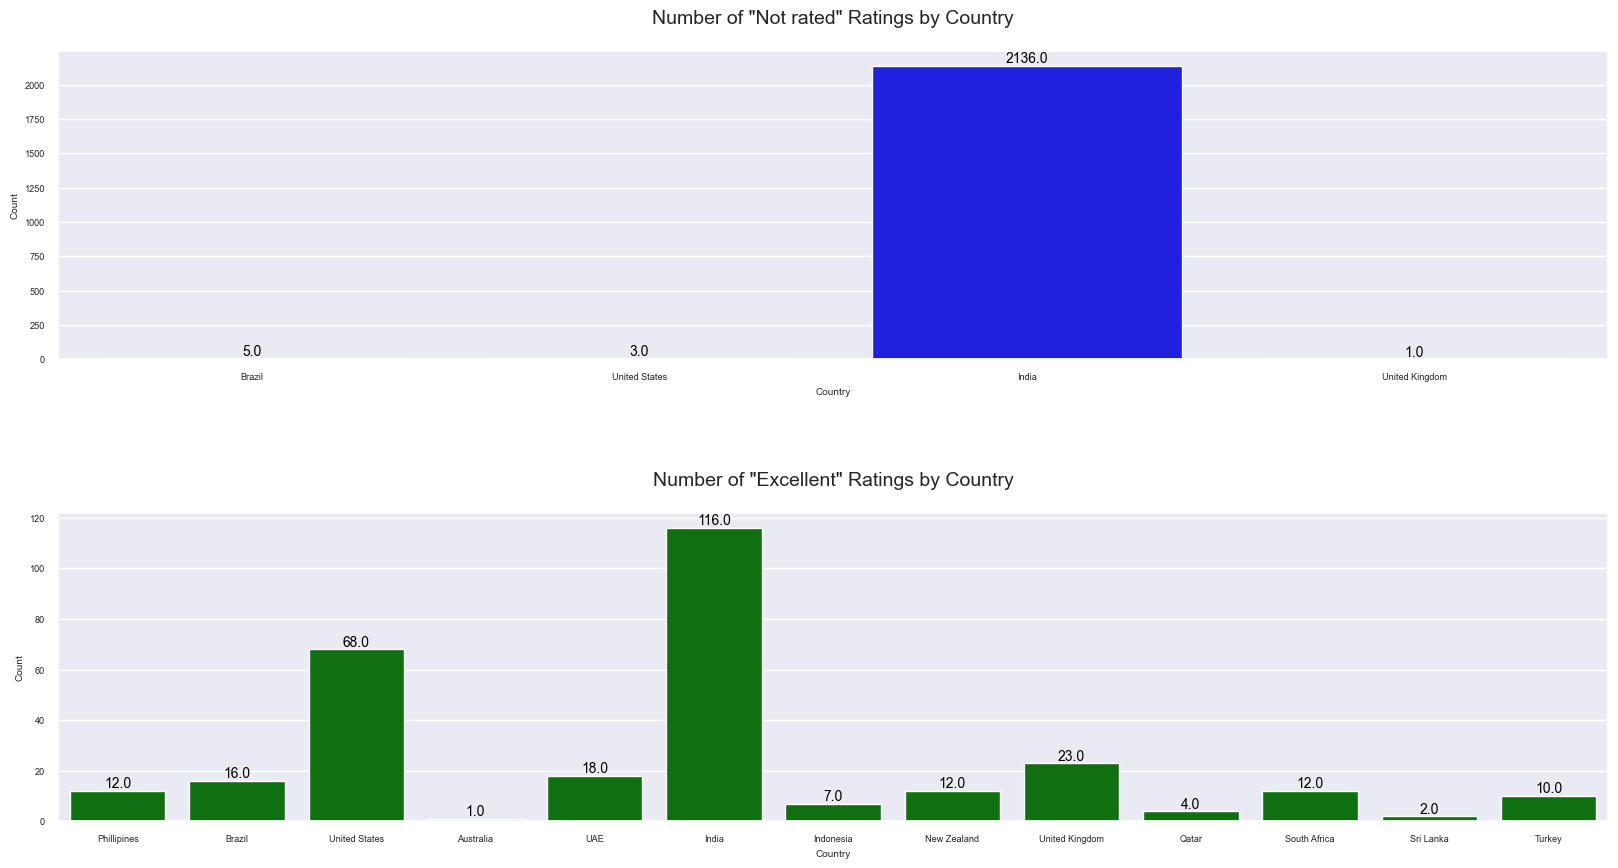

In [97]:
filtered_df = df[df['Rating text'].isin(['Not rated', 'Excellent'])]

# Create separate countplots for 'Not rated' and 'Very Good' rating
plt.figure(figsize=(20, 10))
colors = ['blue', 'green']

for i, rating in enumerate(['Not rated', 'Excellent']):
    plt.subplot(2, 1, i+1)
    ax = sns.countplot(data=filtered_df[filtered_df['Rating text'] == rating], x='Country', palette=[colors[i]])
    for p in ax.patches:
        ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', fontsize=10,
                   color='black')
    plt.title(f'Number of "{rating}" Ratings by Country', fontsize=14, pad=20 )
    plt.xlabel('Country')
    plt.ylabel('Count')
plt.subplots_adjust(hspace=0.5)

####  Maximum "Not rated" rating comes from India and also maximum "Excellent" rating comes from India

In [40]:
top_Cuisines=df['Cuisines'].value_counts()[:10].index.tolist()
top_Cuisines

['North Indian',
 'North Indian, Chinese',
 'Chinese',
 'Fast Food',
 'North Indian, Mughlai',
 'Cafe',
 'Bakery',
 'North Indian, Mughlai, Chinese',
 'Bakery, Desserts',
 'Street Food']

     Cuisines  Aggregate rating        Country
5     Chinese               4.4    Phillipines
23       Cafe               3.8         Brazil
24     Bakery               3.7         Brazil
88  Fast Food               3.5  United States
93    Chinese               3.8  United States


(array([0., 1., 2., 3., 4., 5., 6.]),
 [Text(0, 0.0, '0'),
  Text(0, 1.0, '1'),
  Text(0, 2.0, '2'),
  Text(0, 3.0, '3'),
  Text(0, 4.0, '4'),
  Text(0, 5.0, '5'),
  Text(0, 6.0, '6')])

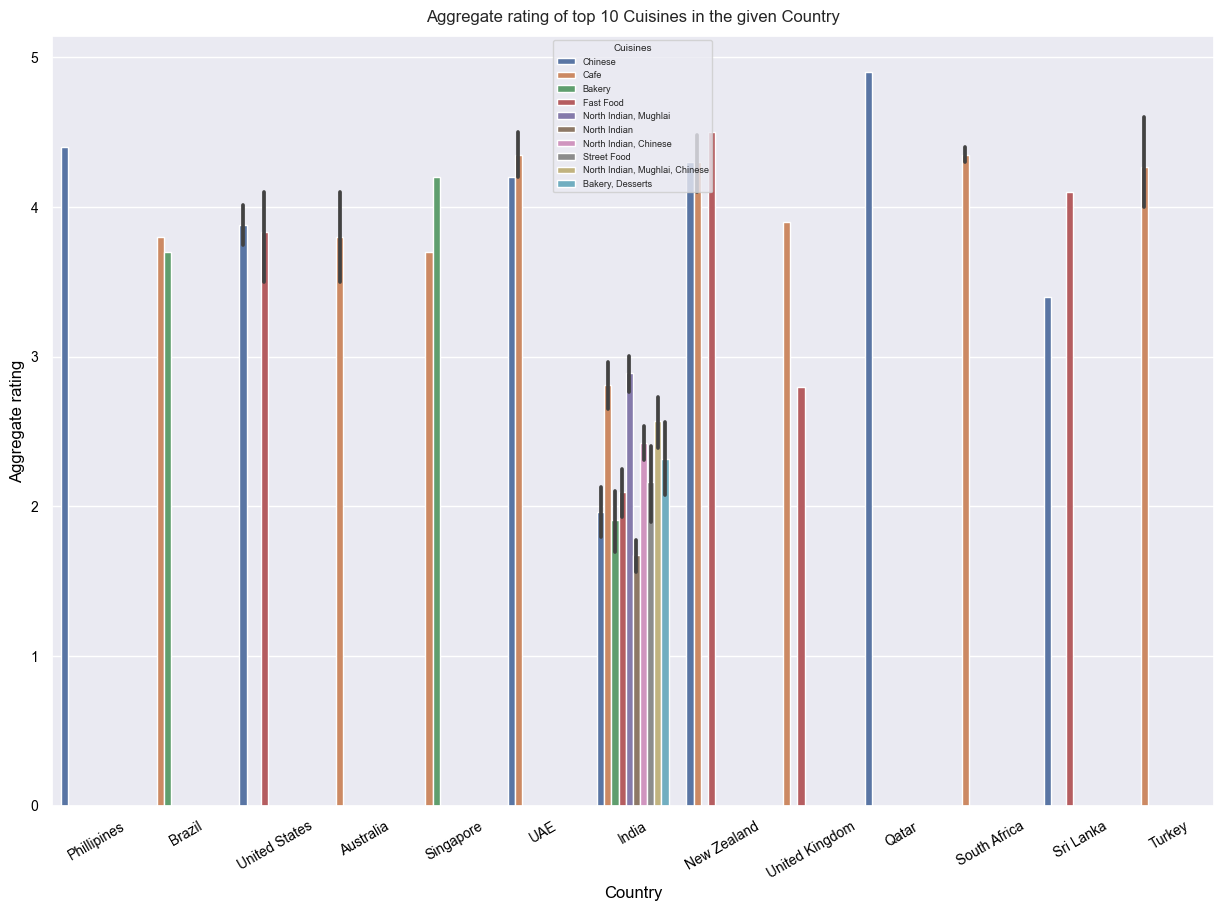

In [96]:
# Filter the DataFrame based on the top ten cuisines
filtered_df = df[df['Cuisines'].isin(top_Cuisines)]

# Get the corresponding rating for each cuisine
corresponding_data = filtered_df[['Cuisines', 'Aggregate rating','Country']]
print(corresponding_data.head())

plt.figure(figsize=(15,10))
sns.set(font_scale=0.6)
sns.barplot(data=corresponding_data, x='Country',y='Aggregate rating',hue='Cuisines')
plt.title("Aggregate rating of top 10 Cuisines in the given Country",fontsize=12, pad=10)
plt.xlabel('Country',fontsize=12,color='black')
plt.ylabel('Aggregate rating',fontsize=12,color='black')
plt.xticks(fontsize=10,rotation=30,color='black')
plt.yticks(fontsize=10,color='black')

##### Most of the given countries  likes  Cafe, Chinese  and Fast Food.

             Locality       City  Aggregate rating
855     Krishna Nagar   Dehradun               4.1
2353    Malviya Nagar     Jaipur               4.3
2999  Connaught Place  New Delhi               2.6
3000  Connaught Place  New Delhi               2.9
3001  Connaught Place  New Delhi               3.4


(array([0., 1., 2., 3., 4., 5.]),
 [Text(0, 0.0, '0'),
  Text(0, 1.0, '1'),
  Text(0, 2.0, '2'),
  Text(0, 3.0, '3'),
  Text(0, 4.0, '4'),
  Text(0, 5.0, '5')])

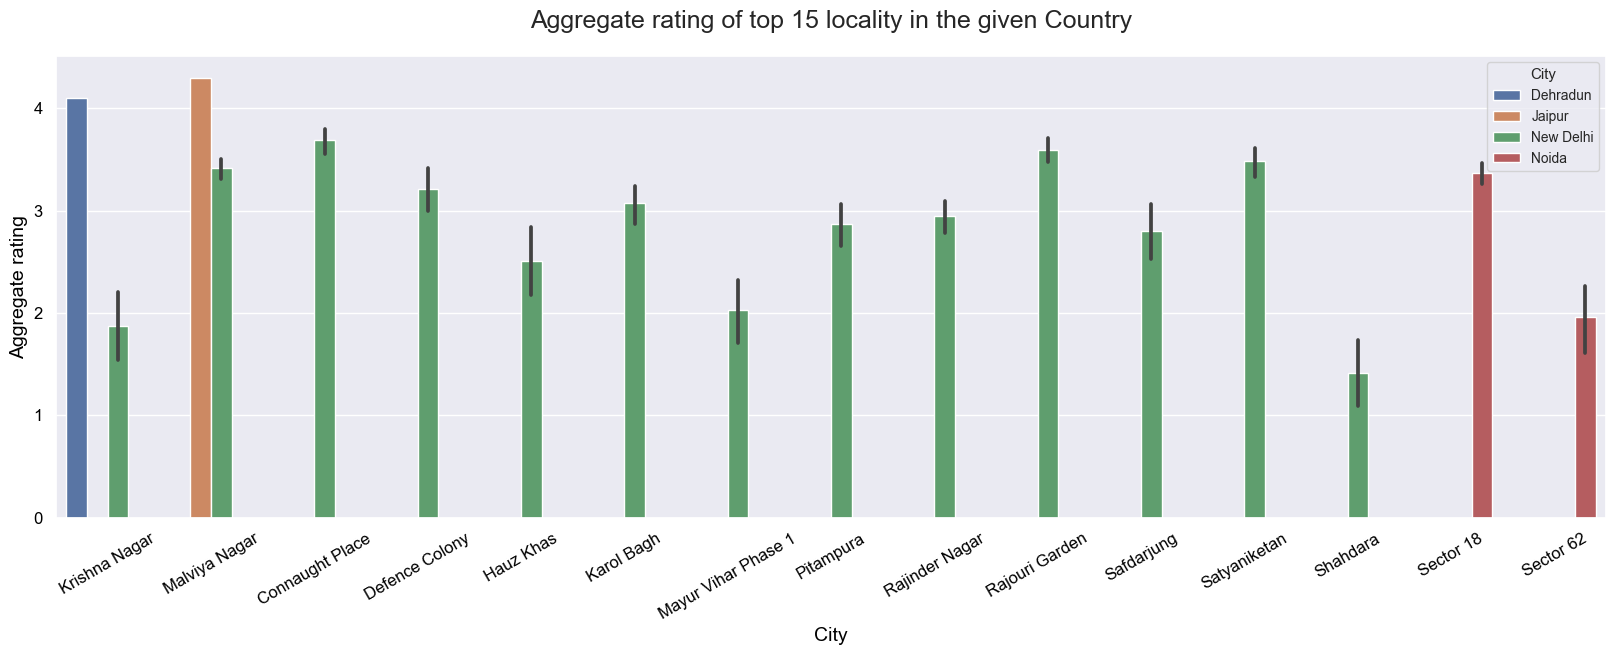

In [42]:
top_locality=df['Locality'].value_counts()[:15].index.tolist()

filtered_df = df[df['Locality'].isin(top_locality)]
corresponding_data= filtered_df[['Locality', 'City','Aggregate rating']]
print(corresponding_data.head())

plt.figure(figsize=(20,6))
sns.set(font_scale=0.9)
sns.barplot(data=corresponding_data, x='Locality',y='Aggregate rating',hue='City')
plt.title("Aggregate rating of top 15 locality in the given Country",fontsize=18, pad=20)
plt.xlabel('City',fontsize=14,color='black')
plt.ylabel('Aggregate rating',fontsize=14,color='black')
plt.xticks(fontsize=12,rotation=30,color='black')
plt.yticks(fontsize=12,color='black')

     Restaurant Name  Aggregate rating Country
587  Barbeque Nation               4.5     UAE
613        Pizza Hut               2.4     UAE
641        Pizza Hut               4.4   India
672       McDonald's               3.3   India
674        Pizza Hut               3.4   India


(array([0., 1., 2., 3., 4., 5.]),
 [Text(0, 0.0, '0'),
  Text(0, 1.0, '1'),
  Text(0, 2.0, '2'),
  Text(0, 3.0, '3'),
  Text(0, 4.0, '4'),
  Text(0, 5.0, '5')])

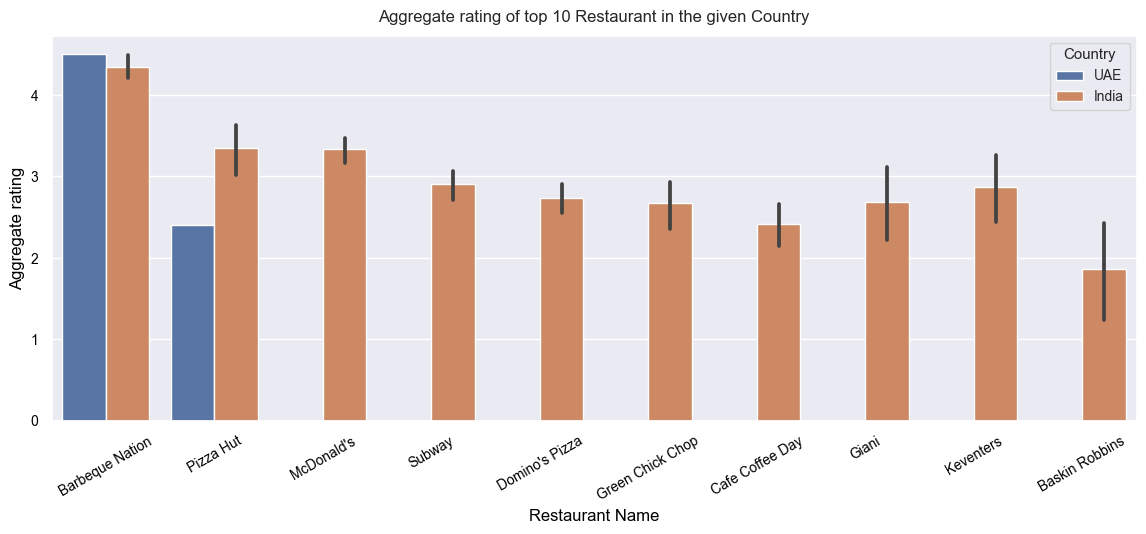

In [43]:
top_restaurant=df['Restaurant Name'].value_counts()[:10].index.tolist()

filtered_df = df[df['Restaurant Name'].isin(top_restaurant)]
corresponding_data= filtered_df[['Restaurant Name', 'Aggregate rating','Country']]
print(corresponding_data.head())

plt.figure(figsize=(14,5))
sns.set(font_scale=0.9)
sns.barplot(data=corresponding_data, x='Restaurant Name',y='Aggregate rating',hue='Country')
plt.title("Aggregate rating of top 10 Restaurant in the given Country",fontsize=12, pad=10)
plt.xlabel('Restaurant Name',fontsize=12,color='black')
plt.ylabel('Aggregate rating',fontsize=12,color='black')
plt.xticks(fontsize=10,rotation=30,color='black')
plt.yticks(fontsize=10,color='black')

####  In  the Top 10 Restaurant  Barbeque  Nation got maximum Aggregate rating from India as well as UAE.

In [44]:
India_data=df[df['Country']=='India'].groupby(['Cuisines','Average Cost for two','Currency','City','Restaurant Name','Aggregate rating','Rating color','Rating text']).size().reset_index()

In [45]:
India_data.head()

,Cuisines,Average Cost for two,Currency,City,Restaurant Name,Aggregate rating,Rating color,Rating text,0
0,Afghani,300,Indian Rupees(Rs.),New Delhi,Pak Afghan Restaurant,0.0,White,Not rated,1
1,Afghani,500,Indian Rupees(Rs.),Gurgaon,Afghan Indian,0.0,White,Not rated,1
2,Afghani,550,Indian Rupees(Rs.),New Delhi,Kabul Delhi,2.9,Orange,Average,1
3,Afghani,700,Indian Rupees(Rs.),Gurgaon,Burj Al Arab,0.0,White,Not rated,1
4,"Afghani, Mughlai, Chinese",500,Indian Rupees(Rs.),New Delhi,Al- Sheikh,0.0,White,Not rated,1


In [46]:
print(India_data['Average Cost for two'].min())
print(India_data['Average Cost for two'].max())

0
8000


In [47]:
low_price_in_India = India_data[(India_data['Average Cost for two'] > 0) & (India_data['Average Cost for two'] <= 1000)].groupby(['Cuisines', 'City', 'Restaurant Name'])['Average Cost for two'].mean().sort_values(ascending=True).reset_index()
low_price_in_India.head()

,Cuisines,City,Restaurant Name,Average Cost for two
0,North Indian,New Delhi,Famous Parantha and Poori Sabzi,50.0
1,Street Food,New Delhi,Shahi Kachauri,50.0
2,Chinese,Noida,Indian Special Hot Momos,50.0
3,Street Food,New Delhi,Shahi Kachauri Wale,50.0
4,North Indian,New Delhi,Raju De Special Paneer Wale,50.0


In [48]:
low_price_in_India['City'].unique()

array(['New Delhi', 'Noida', 'Nashik', 'Faridabad', 'Gurgaon', 'Amritsar',
       'Ghaziabad', 'Puducherry', 'Varanasi', 'Allahabad', 'Mangalore',
       'Lucknow', 'Bhopal', 'Ranchi', 'Nagpur', 'Surat', 'Indore',
       'Mysore', 'Vadodara', 'Coimbatore', 'Aurangabad', 'Vizag', 'Patna',
       'Guwahati', 'Ahmedabad', 'Bhubaneshwar', 'Kochi', 'Chennai',
       'Dehradun', 'Kanpur', 'Agra', 'Bangalore', 'Ludhiana',
       'Chandigarh', 'Hyderabad', 'Mumbai', 'Mohali', 'Goa', 'Jaipur',
       'Secunderabad', 'Kolkata', 'Pune'], dtype=object)

In [49]:
high_price_in_India = India_data[(India_data['Average Cost for two'] >=4000) & (India_data['Average Cost for two'] <=8000)].groupby(['Cuisines', 'City', 'Restaurant Name','Aggregate rating'])['Average Cost for two'].mean().sort_values(ascending=False).reset_index()
high_price_in_India.head()

,Cuisines,City,Restaurant Name,Aggregate rating,Average Cost for two
0,European,New Delhi,Orient Express - Taj Palace Hotel,4.0,8000.0
1,"Asian, Japanese, Korean, Thai, Chinese",New Delhi,Tian - Asian Cuisine Studio - ITC Maurya,4.1,7000.0
2,North Indian,New Delhi,Bukhara - ITC Maurya,4.4,6500.0
3,"Japanese, Sushi",New Delhi,Wasabi by Morimoto - The Taj Mahal Hotel,3.9,6000.0
4,"Malaysian, Thai, Kerala, Vietnamese, Sri Lankan",New Delhi,The Spice Route - The Imperial,4.0,6000.0


In [50]:
high_price_in_India['City'].unique()

array(['New Delhi', 'Gurgaon'], dtype=object)

Text(0.5, 1.0, 'Cuisines price')

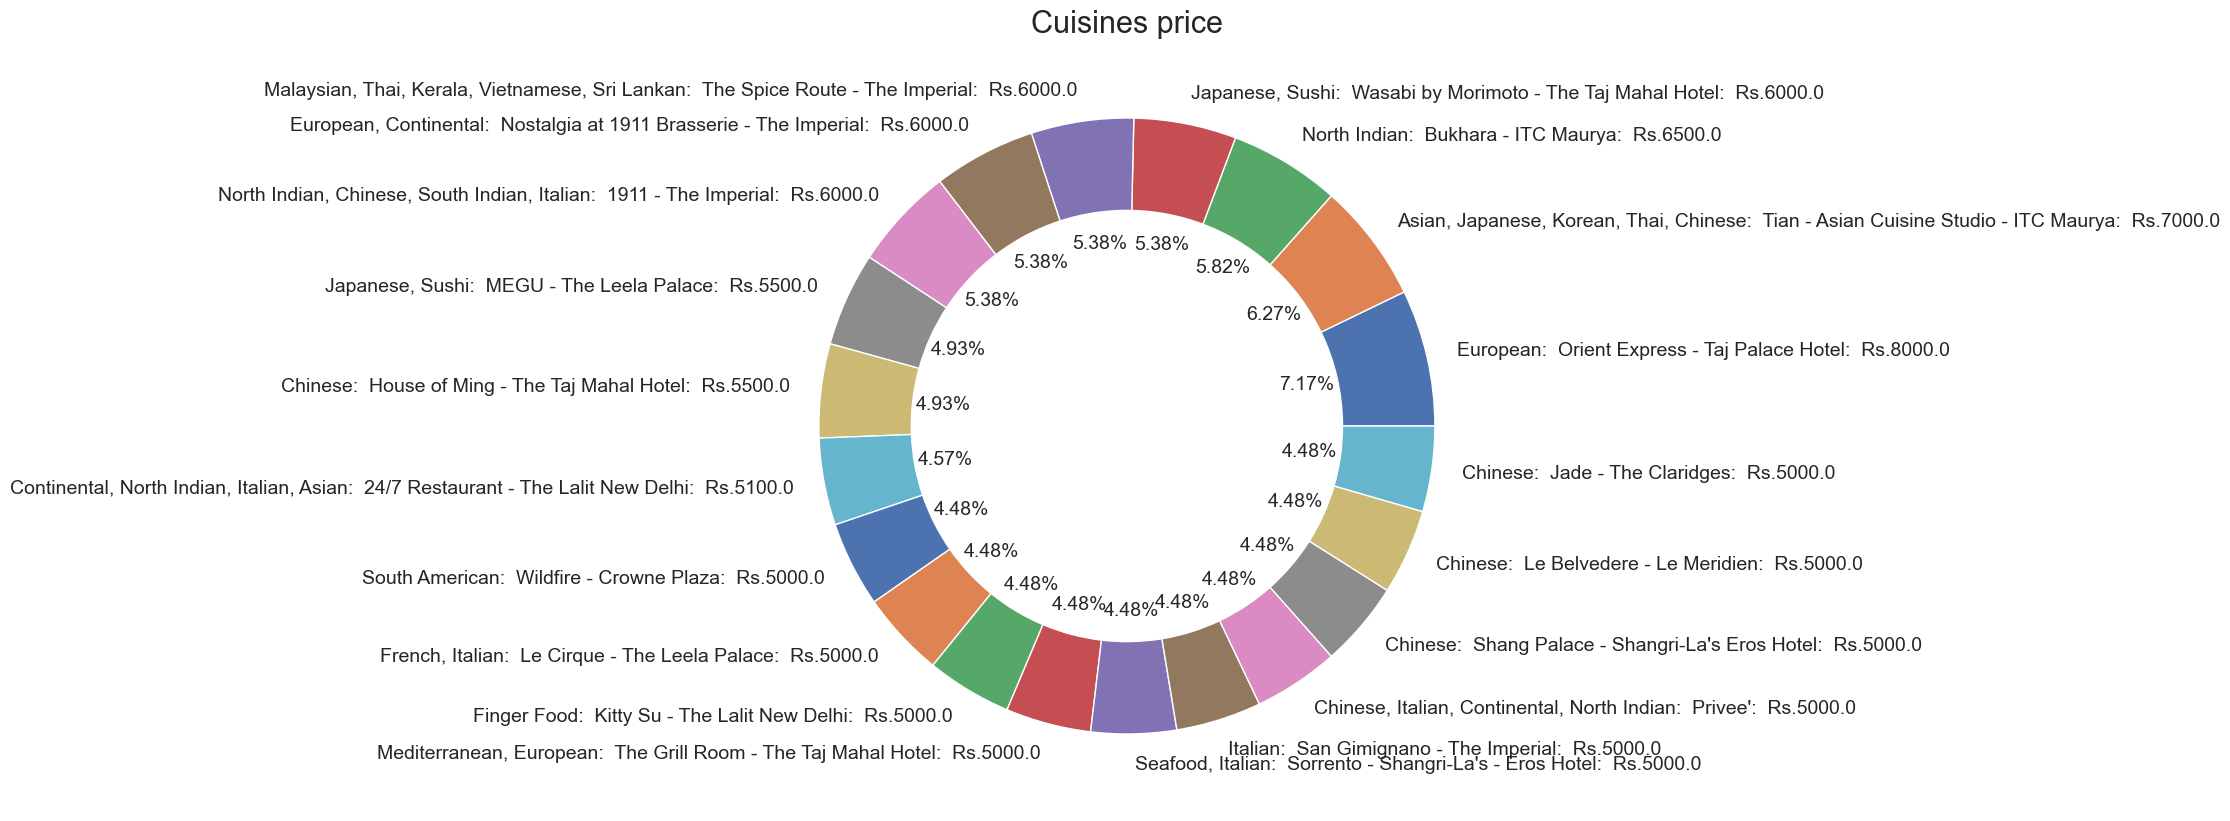

In [51]:
labels = [f"{cuisine}:  {restaurant}:  Rs.{cost}" for cuisine, restaurant,cost in zip(high_price_in_India['Cuisines'][:20], high_price_in_India['Restaurant Name'][:20], high_price_in_India['Average Cost for two'][:20])]
plt.figure(figsize=(10,10))
plt.pie(high_price_in_India['Average Cost for two'][:20], labels=labels, autopct='%1.2f%%', textprops={'fontsize': 14}, wedgeprops=dict(width=0.3))
plt.title("Cuisines price",fontsize=22)

####  In India, most valuable Cuisines (European) with  average cost for two  Rs. 8000, which  is available at  Orient Express - Taj Palace Hotel, New Delhi	

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Orient Express - Taj Palace Hotel'),
  Text(1, 0, 'Tian - Asian Cuisine Studio - ITC Maurya'),
  Text(2, 0, 'Bukhara - ITC Maurya'),
  Text(3, 0, 'Wasabi by Morimoto - The Taj Mahal Hotel'),
  Text(4, 0, 'The Spice Route - The Imperial')])

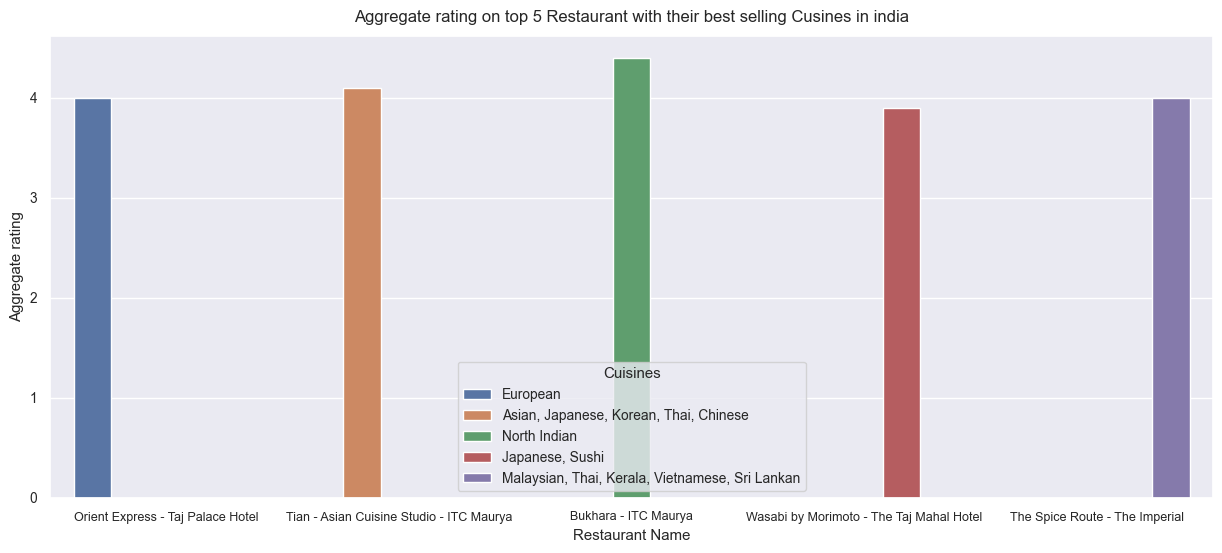

In [52]:
plt.figure(figsize=(15,6))
sns.barplot(data=high_price_in_India[:5], x=('Restaurant Name'),y=('Aggregate rating'), hue=('Cuisines'))
plt.title("Aggregate rating on top 5 Restaurant with their best selling Cusines in india", fontsize=12,pad=10)
plt.xticks(fontsize=9)

####  From top 5 Restaurant with high price rate in india Bukhara-ITC Maurya got maximum rating for their North Indian Cuisines.

In [53]:
US_data=df[df['Country']=='United States'].groupby(['Cuisines','Average Cost for two','Currency','City','Restaurant Name','Aggregate rating','Rating color','Rating text']).size().reset_index()

In [54]:
US_data.head()

,Cuisines,Average Cost for two,Currency,City,Restaurant Name,Aggregate rating,Rating color,Rating text,0
0,American,10,Dollar($),Davenport,Front Street Brewery,4.3,Green,Very Good,1
1,American,10,Dollar($),Sioux City,Miles Inn,3.7,Yellow,Good,1
2,American,25,Dollar($),Columbus,Mark's City Grille,4.5,Dark Green,Excellent,1
3,American,25,Dollar($),Columbus,The Black Cow,4.3,Green,Very Good,1
4,American,25,Dollar($),Dalton,Chili's Grill & Bar,3.8,Yellow,Good,1


In [55]:
print(US_data['Average Cost for two'].min())
print(US_data['Average Cost for two'].max())

0
100


In [56]:
low_price_in_US = US_data[(US_data['Average Cost for two'] > 0) & (US_data['Average Cost for two'] <=30)].groupby(['Cuisines', 'City', 'Restaurant Name','Aggregate rating'])['Average Cost for two'].mean().sort_values(ascending=True).reset_index()
low_price_in_US.head()

,Cuisines,City,Restaurant Name,Aggregate rating,Average Cost for two
0,Vietnamese,Augusta,Pho Bac,4.1,10.0
1,"Japanese, Korean",Athens,Choo Choo Eastside,3.9,10.0
2,Bar Food,Athens,The Royal Peasant,4.4,10.0
3,Japanese,Rest of Hawaii,Marukame Udon,4.9,10.0
4,Japanese,Dalton,Soho Hibachi,4.3,10.0


In [57]:
low_price_in_US['City'].unique()

array(['Augusta', 'Athens', 'Rest of Hawaii', 'Dalton', 'Boise',
       'Dubuque', 'Mc Millan', 'Pensacola', 'Gainesville', 'Columbus',
       'Des Moines', 'Sioux City', 'Albany', 'Orlando', 'Pocatello',
       'Macon', 'Savannah', 'Cedar Rapids/Iowa City', 'Waterloo',
       'Vernonia', 'Davenport', 'Valdosta', 'Lakeview', 'Tampa Bay',
       'Clatskanie', 'Fernley', 'Lincoln', 'Monroe', 'Potrero', 'Weirton',
       'Winchester Bay', 'Cochrane'], dtype=object)

In [58]:
high_price_in_US = US_data[(US_data['Average Cost for two'] > 60) & (US_data['Average Cost for two'] <=100)].groupby(['Cuisines', 'City', 'Restaurant Name','Aggregate rating'])['Average Cost for two'].mean().sort_values(ascending=False).reset_index()
high_price_in_US.head()

,Cuisines,City,Restaurant Name,Aggregate rating,Average Cost for two
0,"Brazilian, Steak",Orlando,Texas de Brazil,4.6,100.0
1,American,Savannah,Vic's On The River,4.1,70.0
2,"Hawaiian, Seafood",Rest of Hawaii,Mama's Fish House,4.9,70.0
3,Steak,Macon,Downtown Grill,4.0,70.0
4,Seafood,Princeton,Blue Point Grill,4.0,70.0


In [59]:
high_price_in_US['City'].unique()

array(['Orlando', 'Savannah', 'Rest of Hawaii', 'Macon', 'Princeton',
       'Boise', 'Valdosta', 'Tampa Bay', 'Sioux City', 'Dubuque',
       'Des Moines', 'Davenport', 'Albany'], dtype=object)

Text(0.5, 1.0, 'Cuisines price')

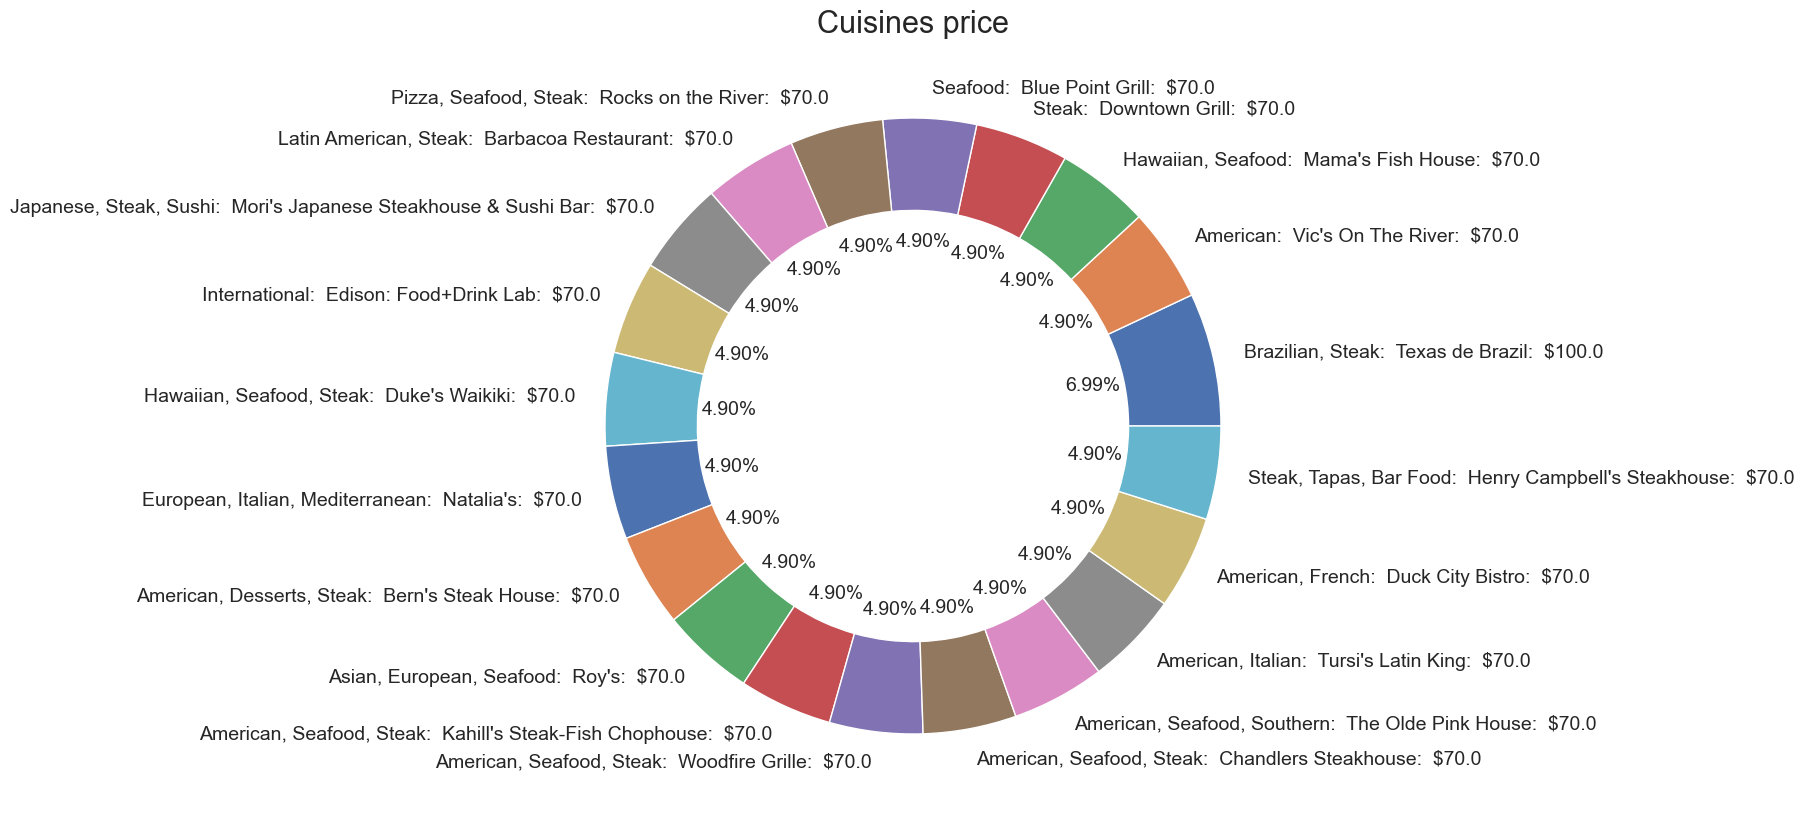

In [60]:
labels = [f"{cuisine}:  {restaurant}:  ${cost}" for cuisine, restaurant,cost in zip(high_price_in_US['Cuisines'][:20], high_price_in_US['Restaurant Name'][:20], high_price_in_US['Average Cost for two'][:20])]
plt.figure(figsize=(10,10))
plt.pie(high_price_in_US['Average Cost for two'][:20], labels=labels, autopct='%1.2f%%', textprops={'fontsize': 14}, wedgeprops=dict(width=0.3))
plt.title("Cuisines price",fontsize=22)

#### In United States, most valuable Cuisines (Brazilian, Steak	) with average cost for two 100 dollars, which is available at Texas de Brazil, Orlando.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Texas de Brazil'),
  Text(1, 0, "Vic's On The River"),
  Text(2, 0, "Mama's Fish House"),
  Text(3, 0, 'Downtown Grill'),
  Text(4, 0, 'Blue Point Grill')])

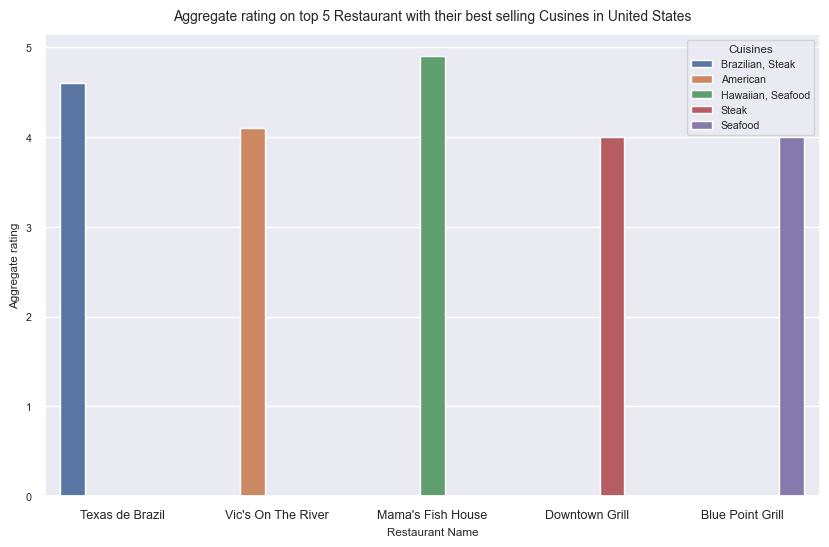

In [61]:
plt.figure(figsize=(10,6))
sns.set(font_scale=0.7)
sns.barplot(data=high_price_in_US[:5], x=('Restaurant Name'),y=('Aggregate rating'), hue=('Cuisines'))
plt.title("Aggregate rating on top 5 Restaurant with their best selling Cusines in United States", fontsize=10, pad=10)
plt.xticks(fontsize=9)

#### From Top 5 Restaurant with high price rate in US Mama's Fish House got maximum rating for their Hawaiian,Seafood Cuisines.

In [62]:
UK_data=df[df['Country']=='United Kingdom'].groupby(['Cuisines','Average Cost for two','Currency','City','Restaurant Name','Aggregate rating','Rating color','Rating text']).size().reset_index()

In [63]:
UK_data.head()

,Cuisines,Average Cost for two,Currency,City,Restaurant Name,Aggregate rating,Rating color,Rating text,0
0,American,35,Pounds(£),Edinburgh,The Hanging Bat,3.5,Yellow,Good,1
1,American,40,Pounds(£),Edinburgh,Hard Rock Cafe,4.0,Green,Very Good,1
2,"American, Burger",30,Pounds(£),London,Five Guys,3.8,Yellow,Good,1
3,"American, Burger",30,Pounds(£),London,Shake Shack,4.1,Green,Very Good,1
4,"American, Burger",40,Pounds(£),London,The Breakfast Club,4.5,Dark Green,Excellent,1


In [64]:
print(UK_data['Average Cost for two'].min())
print(UK_data['Average Cost for two'].max())

10
230


In [65]:
low_price_in_UK = UK_data[(UK_data['Average Cost for two'] >= 10) & (UK_data['Average Cost for two'] <=70)].groupby(['Cuisines', 'City', 'Restaurant Name','Aggregate rating'])['Average Cost for two'].mean().sort_values(ascending=True).reset_index()
low_price_in_UK.head()

,Cuisines,City,Restaurant Name,Aggregate rating,Average Cost for two
0,Fast Food,Birmingham,Pepe's Piri Piri,2.8,10.0
1,"Ice Cream, Desserts, Cafe",Birmingham,Jamjar,3.1,15.0
2,"Fast Food, American",Manchester,Archies,3.4,15.0
3,"Bakery, Cafe",Edinburgh,Love Crumbs,4.1,15.0
4,"Cafe, British",Birmingham,Ju Ju's Cafe,3.7,15.0


In [66]:
low_price_in_UK['City'].unique()

array(['Birmingham', 'Manchester', 'Edinburgh', 'London'], dtype=object)

In [67]:
high_price_in_UK = UK_data[(UK_data['Average Cost for two'] >= 160) & (UK_data['Average Cost for two'] <=230)].groupby(['Cuisines', 'City', 'Restaurant Name','Aggregate rating'])['Average Cost for two'].mean().sort_values(ascending=False).reset_index()
high_price_in_UK.head()

,Cuisines,City,Restaurant Name,Aggregate rating,Average Cost for two
0,French,London,Restaurant Gordon Ramsay,4.7,230.0
1,French,Manchester,The French by Simon Rogan - The Midland,4.3,160.0


Text(0.5, 1.0, 'Cuisines price')

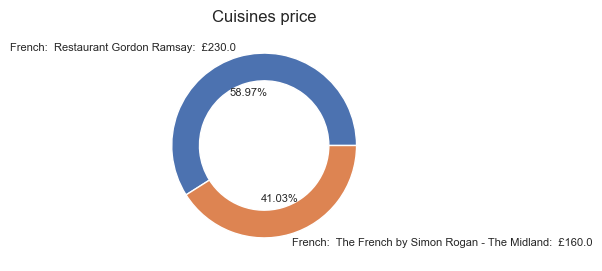

In [68]:
labels = [f"{cuisine}:  {restaurant}:  £{cost}" for cuisine, restaurant,cost in zip(high_price_in_UK['Cuisines'][:], high_price_in_UK['Restaurant Name'][:], high_price_in_UK['Average Cost for two'][:])]
plt.figure(figsize=(3,3))
plt.pie(high_price_in_UK['Average Cost for two'][:], labels=labels, autopct='%1.2f%%', textprops={'fontsize': 8}, wedgeprops=dict(width=0.3))
plt.title("Cuisines price",fontsize=12)

#### In United kingdom, most valuable Cuisines (French ) with average cost for two 230 Euro, which is available at Restaurant Gordon Ramsay, London.

(array([0, 1]),
 [Text(0, 0, 'Restaurant Gordon Ramsay'),
  Text(1, 0, 'The French by Simon Rogan - The Midland')])

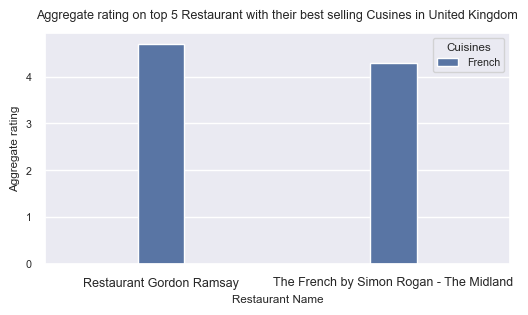

In [69]:
plt.figure(figsize=(6,3))
sns.barplot(data=high_price_in_UK[:], x=('Restaurant Name'),y=('Aggregate rating'), hue=('Cuisines'),width=0.2)
plt.title("Aggregate rating on top 5 Restaurant with their best selling Cusines in United Kingdom", fontsize=9,pad=10)
plt.xticks(fontsize=9)

#### From Top  Restaurant with high price rate in UK Restaurant Gordon Ramsay got maximum rating for their French Cuisines.

In [70]:
India_data.head()

,Cuisines,Average Cost for two,Currency,City,Restaurant Name,Aggregate rating,Rating color,Rating text,0
0,Afghani,300,Indian Rupees(Rs.),New Delhi,Pak Afghan Restaurant,0.0,White,Not rated,1
1,Afghani,500,Indian Rupees(Rs.),Gurgaon,Afghan Indian,0.0,White,Not rated,1
2,Afghani,550,Indian Rupees(Rs.),New Delhi,Kabul Delhi,2.9,Orange,Average,1
3,Afghani,700,Indian Rupees(Rs.),Gurgaon,Burj Al Arab,0.0,White,Not rated,1
4,"Afghani, Mughlai, Chinese",500,Indian Rupees(Rs.),New Delhi,Al- Sheikh,0.0,White,Not rated,1


In [71]:
India_data['Rating_text_color']=India_data['Rating text']+ "("+India_data['Rating color']+ ")"

In [72]:
India_data.head()

,Cuisines,Average Cost for two,Currency,City,Restaurant Name,Aggregate rating,Rating color,Rating text,0,Rating_text_color
0,Afghani,300,Indian Rupees(Rs.),New Delhi,Pak Afghan Restaurant,0.0,White,Not rated,1,Not rated(White)
1,Afghani,500,Indian Rupees(Rs.),Gurgaon,Afghan Indian,0.0,White,Not rated,1,Not rated(White)
2,Afghani,550,Indian Rupees(Rs.),New Delhi,Kabul Delhi,2.9,Orange,Average,1,Average(Orange)
3,Afghani,700,Indian Rupees(Rs.),Gurgaon,Burj Al Arab,0.0,White,Not rated,1,Not rated(White)
4,"Afghani, Mughlai, Chinese",500,Indian Rupees(Rs.),New Delhi,Al- Sheikh,0.0,White,Not rated,1,Not rated(White)


In [73]:
India_data['Cuisines'].value_counts().index[:10]

Index(['North Indian', 'North Indian, Chinese', 'Fast Food', 'Chinese',
       'North Indian, Mughlai', 'Bakery', 'Cafe',
       'North Indian, Mughlai, Chinese', 'Bakery, Desserts', 'Street Food'],
      dtype='object', name='Cuisines')

    Cuisines Rating_text_color
167   Bakery   Average(Orange)
168   Bakery  Not rated(White)
169   Bakery  Not rated(White)
170   Bakery  Not rated(White)
171   Bakery  Not rated(White)


(array([  0., 100., 200., 300., 400., 500.]),
 [Text(0, 0.0, '0'),
  Text(0, 100.0, '100'),
  Text(0, 200.0, '200'),
  Text(0, 300.0, '300'),
  Text(0, 400.0, '400'),
  Text(0, 500.0, '500')])

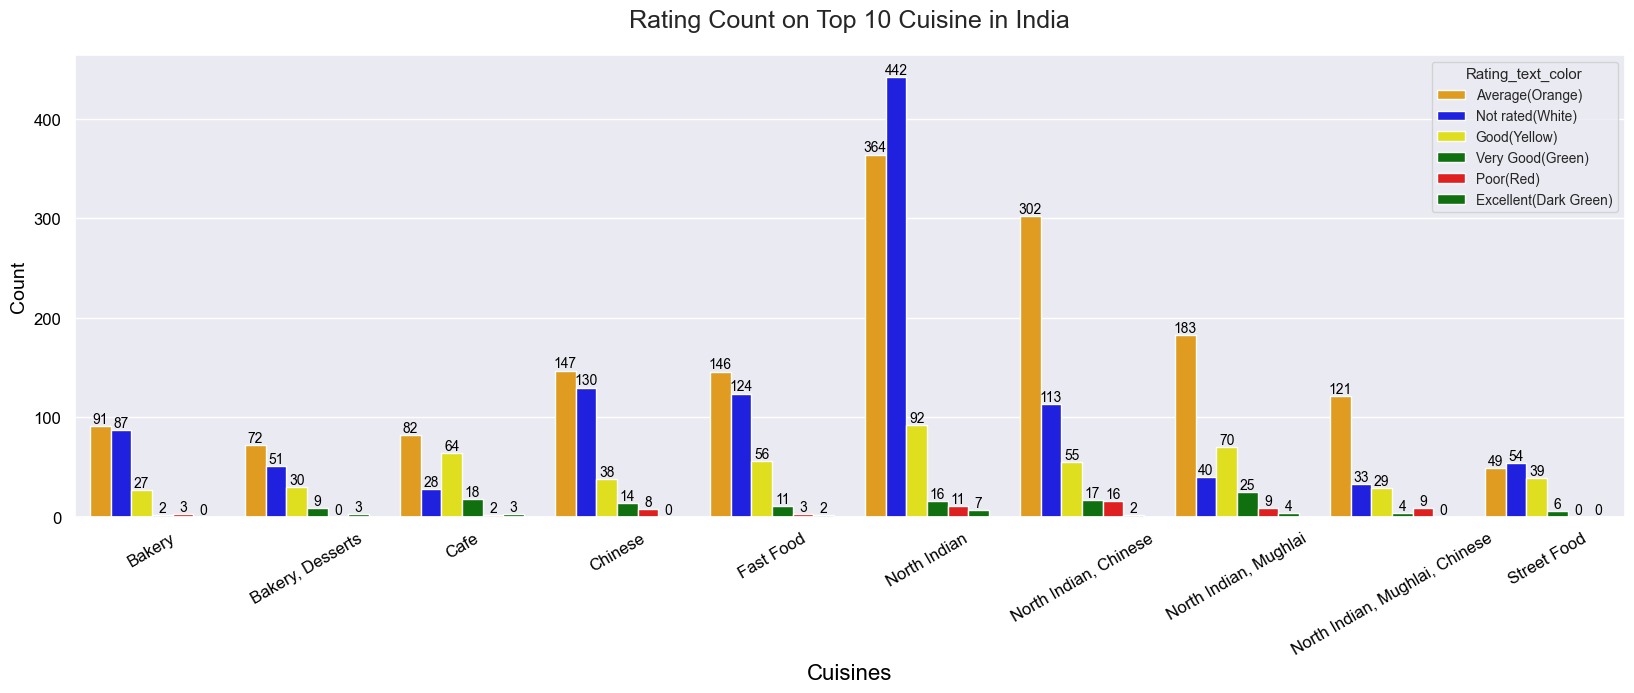

In [94]:
Top_cuisines_in_India =India_data['Cuisines'].value_counts().index[:10]

filtered_India_df = India_data[India_data['Cuisines'].isin(Top_cuisines_in_India)]
filter_data= filtered_India_df[['Cuisines', 'Rating_text_color']]
print(filter_data.head())

plt.figure(figsize=(20,6))
sns.set(font_scale=0.9)
sns.countplot(data=filter_data, x='Cuisines',hue='Rating_text_color', palette=['orange','blue','yellow','green','red','green'])
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{int(height)}", (p.get_x() + p.get_width() / 2, height),ha='center', va='bottom', fontsize=10, color='black')
plt.title("Rating Count on Top 10 Cuisine in India", fontsize=18, pad=20)
plt.xlabel('Cuisines',fontsize=16,color='black')
plt.ylabel('Count',fontsize=14,color='black')
plt.xticks(fontsize=12,rotation=30,color='black')
plt.yticks(fontsize=12,color='black')

In [75]:
US_data.head()

,Cuisines,Average Cost for two,Currency,City,Restaurant Name,Aggregate rating,Rating color,Rating text,0
0,American,10,Dollar($),Davenport,Front Street Brewery,4.3,Green,Very Good,1
1,American,10,Dollar($),Sioux City,Miles Inn,3.7,Yellow,Good,1
2,American,25,Dollar($),Columbus,Mark's City Grille,4.5,Dark Green,Excellent,1
3,American,25,Dollar($),Columbus,The Black Cow,4.3,Green,Very Good,1
4,American,25,Dollar($),Dalton,Chili's Grill & Bar,3.8,Yellow,Good,1


In [76]:
US_data['Rating_text_color']=US_data['Rating text']+ "("+US_data['Rating color']+ ")"

In [77]:
US_data.head()

,Cuisines,Average Cost for two,Currency,City,Restaurant Name,Aggregate rating,Rating color,Rating text,0,Rating_text_color
0,American,10,Dollar($),Davenport,Front Street Brewery,4.3,Green,Very Good,1,Very Good(Green)
1,American,10,Dollar($),Sioux City,Miles Inn,3.7,Yellow,Good,1,Good(Yellow)
2,American,25,Dollar($),Columbus,Mark's City Grille,4.5,Dark Green,Excellent,1,Excellent(Dark Green)
3,American,25,Dollar($),Columbus,The Black Cow,4.3,Green,Very Good,1,Very Good(Green)
4,American,25,Dollar($),Dalton,Chili's Grill & Bar,3.8,Yellow,Good,1,Good(Yellow)


In [78]:
US_data['Cuisines'].value_counts().index[:10]

Index(['Mexican', 'American', 'Chinese', 'BBQ', 'Missing',
       'Japanese, Steak, Sushi', 'Italian', 'Italian, Pizza', 'Seafood',
       'American, Seafood, Steak'],
      dtype='object', name='Cuisines')

   Cuisines      Rating_text_color
0  American       Very Good(Green)
1  American           Good(Yellow)
2  American  Excellent(Dark Green)
3  American       Very Good(Green)
4  American           Good(Yellow)


(array([ 0.,  2.,  4.,  6.,  8., 10., 12.]),
 [Text(0, 0.0, '0'),
  Text(0, 2.0, '2'),
  Text(0, 4.0, '4'),
  Text(0, 6.0, '6'),
  Text(0, 8.0, '8'),
  Text(0, 10.0, '10'),
  Text(0, 12.0, '12')])

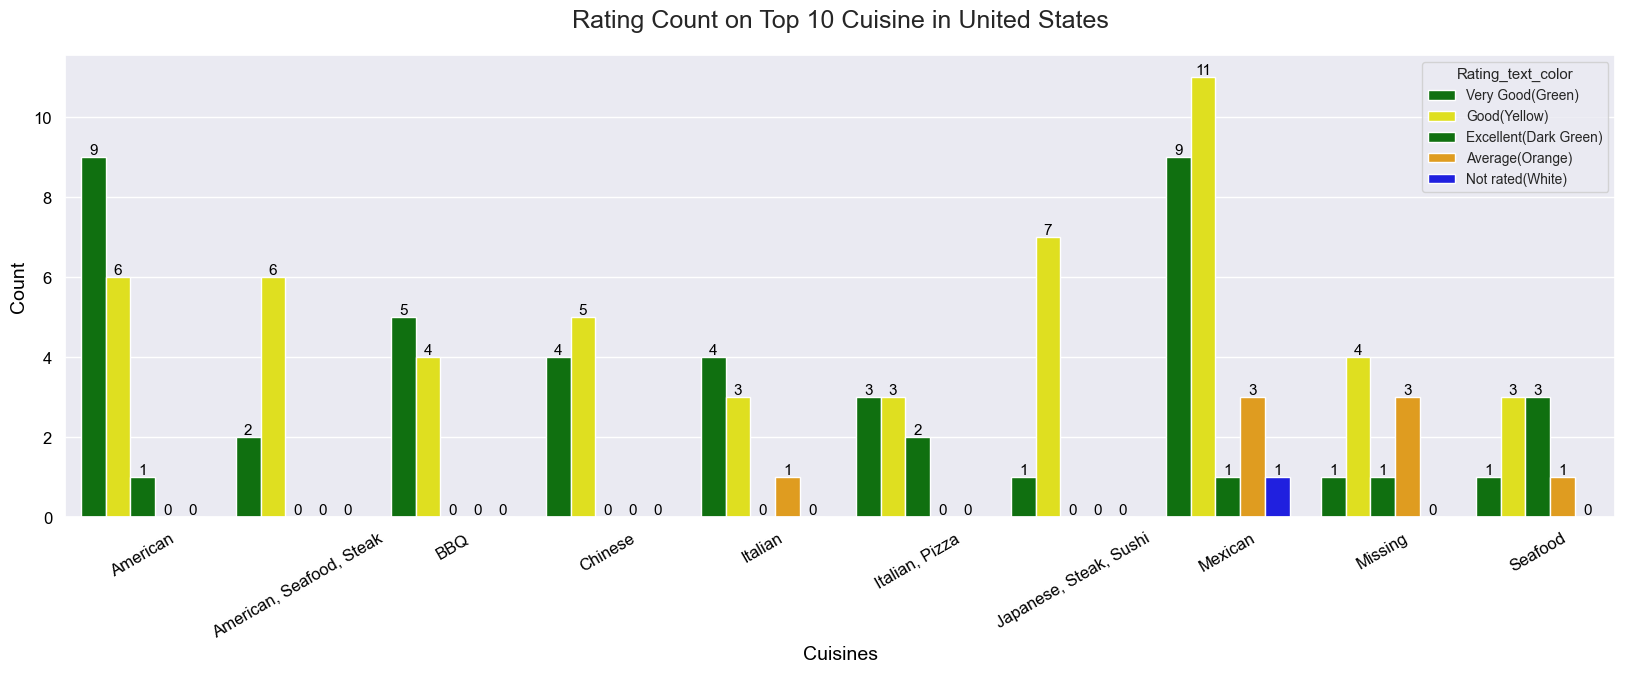

In [79]:
Top_cuisines_in_US =US_data['Cuisines'].value_counts().index[:10]

filtered_US_df = US_data[US_data['Cuisines'].isin(Top_cuisines_in_US)]
filter_data= filtered_US_df[['Cuisines', 'Rating_text_color']]
print(filter_data.head())

plt.figure(figsize=(20,6))
sns.set(font_scale=0.9)
sns.countplot(data=filter_data, x='Cuisines',hue='Rating_text_color', palette=['green','yellow','green','orange','blue'])
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{int(height)}", (p.get_x() + p.get_width() / 2, height),ha='center', va='bottom', fontsize=11, color='black')
plt.title("Rating Count on Top 10 Cuisine in United States", fontsize=18, pad=20)
plt.xlabel('Cuisines',fontsize=14,color='black')
plt.ylabel('Count',fontsize=14,color='black')
plt.xticks(fontsize=12,rotation=30,color='black')
plt.yticks(fontsize=12,color='black')

In [80]:
UK_data.head()

,Cuisines,Average Cost for two,Currency,City,Restaurant Name,Aggregate rating,Rating color,Rating text,0
0,American,35,Pounds(£),Edinburgh,The Hanging Bat,3.5,Yellow,Good,1
1,American,40,Pounds(£),Edinburgh,Hard Rock Cafe,4.0,Green,Very Good,1
2,"American, Burger",30,Pounds(£),London,Five Guys,3.8,Yellow,Good,1
3,"American, Burger",30,Pounds(£),London,Shake Shack,4.1,Green,Very Good,1
4,"American, Burger",40,Pounds(£),London,The Breakfast Club,4.5,Dark Green,Excellent,1


In [81]:
UK_data['Rating_text_color']=UK_data['Rating text']+ "("+UK_data['Rating color']+ ")"

In [82]:
UK_data.head()

,Cuisines,Average Cost for two,Currency,City,Restaurant Name,Aggregate rating,Rating color,Rating text,0,Rating_text_color
0,American,35,Pounds(£),Edinburgh,The Hanging Bat,3.5,Yellow,Good,1,Good(Yellow)
1,American,40,Pounds(£),Edinburgh,Hard Rock Cafe,4.0,Green,Very Good,1,Very Good(Green)
2,"American, Burger",30,Pounds(£),London,Five Guys,3.8,Yellow,Good,1,Good(Yellow)
3,"American, Burger",30,Pounds(£),London,Shake Shack,4.1,Green,Very Good,1,Very Good(Green)
4,"American, Burger",40,Pounds(£),London,The Breakfast Club,4.5,Dark Green,Excellent,1,Excellent(Dark Green)


In [83]:
UK_data['Cuisines'].value_counts().index[:10]

Index(['Italian', 'Thai', 'American, Burger', 'British', 'Indian', 'American',
       'Indian, Street Food', 'Japanese, Sushi', 'Burger, American', 'French'],
      dtype='object', name='Cuisines')

           Cuisines      Rating_text_color
0          American           Good(Yellow)
1          American       Very Good(Green)
2  American, Burger           Good(Yellow)
3  American, Burger       Very Good(Green)
4  American, Burger  Excellent(Dark Green)


(array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5]),
 [Text(0, 0.0, '0.0'),
  Text(0, 0.5, '0.5'),
  Text(0, 1.0, '1.0'),
  Text(0, 1.5, '1.5'),
  Text(0, 2.0, '2.0'),
  Text(0, 2.5, '2.5'),
  Text(0, 3.0, '3.0'),
  Text(0, 3.5, '3.5')])

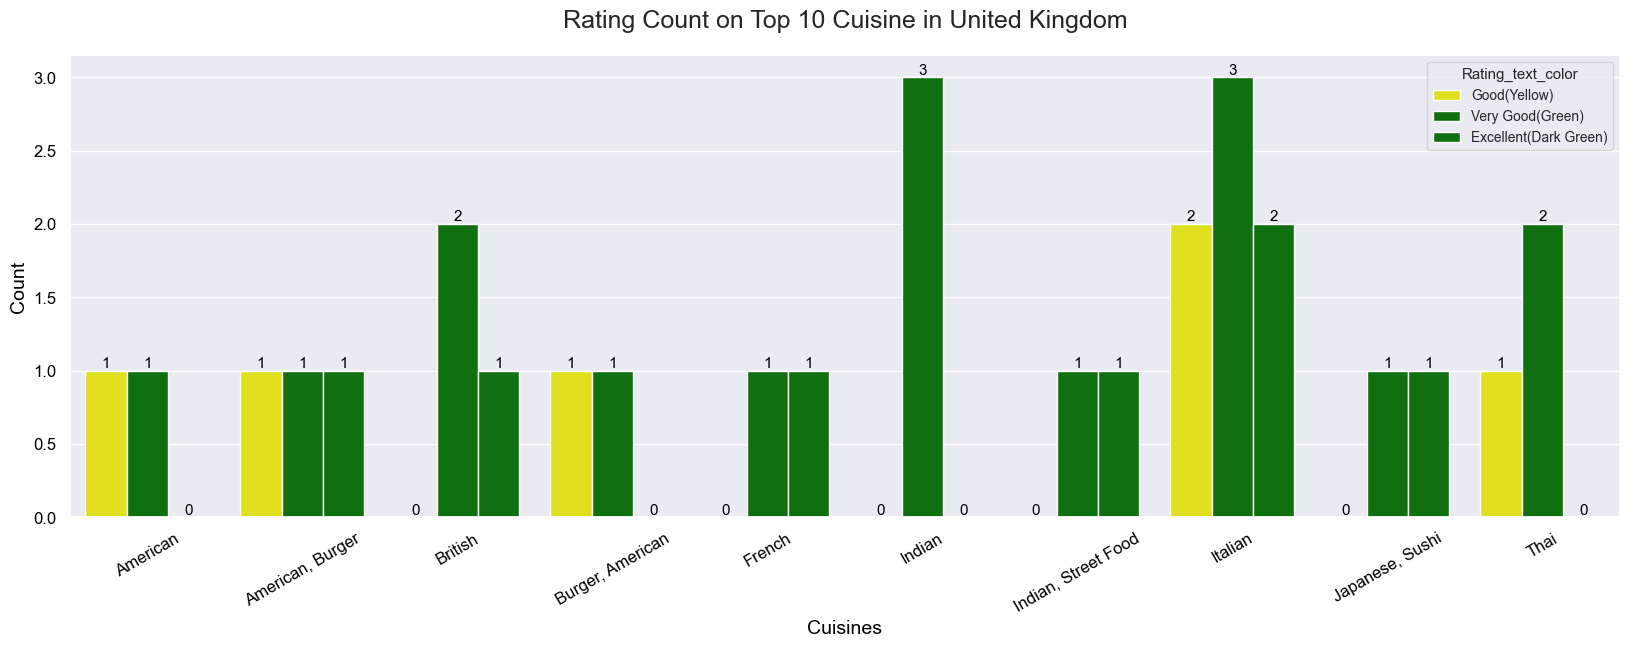

In [84]:
Top_cuisines_in_UK =UK_data['Cuisines'].value_counts().index[:10]

filtered_UK_df = UK_data[UK_data['Cuisines'].isin(Top_cuisines_in_UK)]
filter_data= filtered_UK_df[['Cuisines', 'Rating_text_color']]
print(filter_data.head())

plt.figure(figsize=(20,6))
sns.set(font_scale=0.9)
sns.countplot(data=filter_data, x='Cuisines',hue='Rating_text_color', palette=['yellow','green','green','orange','blue','Red'])
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{int(height)}", (p.get_x() + p.get_width() / 2, height),ha='center', va='bottom', fontsize=11, color='black')
plt.title("Rating Count on Top 10 Cuisine in United Kingdom", fontsize=18, pad=20)
plt.xlabel('Cuisines',fontsize=14,color='black')
plt.ylabel('Count',fontsize=14,color='black')
plt.xticks(fontsize=12,rotation=30,color='black')
plt.yticks(fontsize=12,color='black')

In [85]:
average_data=df.groupby(['Country'])['Aggregate rating'].mean()
average_data

Country
Australia         3.658333
Brazil            3.763333
Canada            3.575000
India             2.524199
Indonesia         4.295238
New Zealand       4.262500
Phillipines       4.468182
Qatar             4.060000
Singapore         3.575000
South Africa      4.210000
Sri Lanka         3.870000
Turkey            4.300000
UAE               4.233333
United Kingdom    4.087500
United States     4.004378
Name: Aggregate rating, dtype: float64

In [86]:
average_data.index

Index(['Australia', 'Brazil', 'Canada', 'India', 'Indonesia', 'New Zealand',
       'Phillipines', 'Qatar', 'Singapore', 'South Africa', 'Sri Lanka',
       'Turkey', 'UAE', 'United Kingdom', 'United States'],
      dtype='object', name='Country')

([<matplotlib.patches.Wedge at 0x2d170c7b10>,
 [Text(1.0791161225408668, 0.21332696517872551, 'Australia'),
  Text(0.9133532728034451, 0.6130137021790262, 'Brazil'),
  Text(0.6103391670941779, 0.9151426670802676, 'Canada'),
  Text(0.28576173432841134, 1.0622336048128107, 'India'),
  Text(-0.11092847814075327, 1.0943924674162266, 'Indonesia'),
  Text(-0.5820355161509538, 0.9333995167873685, 'New Zealand'),
  Text(-0.9392390312389218, 0.5725644437068826, 'Phillipines'),
  Text(-1.0952997063416559, 0.10158028001478718, 'Qatar'),
  Text(-1.045928463769725, -0.3406371216944847, 'Singapore'),
  Text(-0.8195656248006897, -0.7336976125387457, 'South Africa'),
  Text(-0.43802654109304184, -1.0090256435284815, 'Sri Lanka'),
  Text(0.02893252252920473, -1.0996194383240492, 'Turkey'),
  Text(0.5094731978642801, -0.9749036160861977, 'UAE'),
  Text(0.8787918433364108, -0.6616078113848062, 'United Kingdom'),
  Text(1.0749941526283835, -0.23321143156969001, 'United States')],
 [Text(0.5886087941132, 0

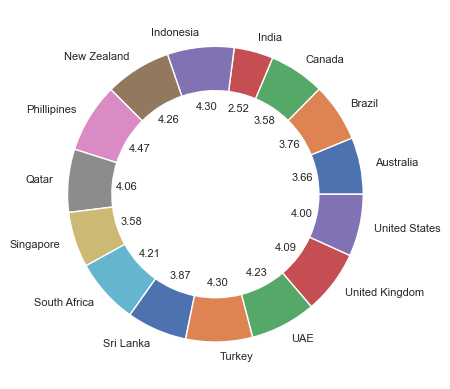

In [87]:
formatted_values = [f"{value:.2f}" for value in average_data]
plt.pie(average_data.values, labels=average_data.index, 
        autopct=lambda x: f'{formatted_values.pop(0)}',wedgeprops=dict(width=0.3),textprops={'fontsize': 8})

#####  Average "Aggregate rating"  for each Country

In [89]:
dataset=df.copy()

In [90]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for feature in categorical_feature:
    label_encoder.fit(dataset[feature])
    dataset[feature] = label_encoder.transform(dataset[feature])

In [91]:
dataset.head()

,Restaurant Name,Country Code,City,Locality,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,3749,162,73,171,920,1100,0,1,0,0,0,3,4.8,0,1,314,6
1,3173,162,73,593,1111,1200,0,1,0,0,0,3,4.5,0,1,591,6
2,2897,162,75,308,1672,4000,0,1,0,0,0,4,4.4,1,5,270,6
3,4707,162,75,862,1126,1500,0,0,0,0,0,4,4.9,0,1,365,6
4,5523,162,75,862,1122,1500,0,1,0,0,0,4,4.8,0,1,229,6


In [92]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9548 entries, 0 to 9550
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant Name       9548 non-null   int32  
 1   Country Code          9548 non-null   int64  
 2   City                  9548 non-null   int32  
 3   Locality              9548 non-null   int32  
 4   Cuisines              9548 non-null   int32  
 5   Average Cost for two  9548 non-null   int64  
 6   Currency              9548 non-null   int32  
 7   Has Table booking     9548 non-null   int32  
 8   Has Online delivery   9548 non-null   int32  
 9   Is delivering now     9548 non-null   int32  
 10  Switch to order menu  9548 non-null   int32  
 11  Price range           9548 non-null   int64  
 12  Aggregate rating      9548 non-null   float64
 13  Rating color          9548 non-null   int32  
 14  Rating text           9548 non-null   int32  
 15  Votes                 9548

### Correlation Analysis

Text(0.5, 1.0, 'Relation Between different features')

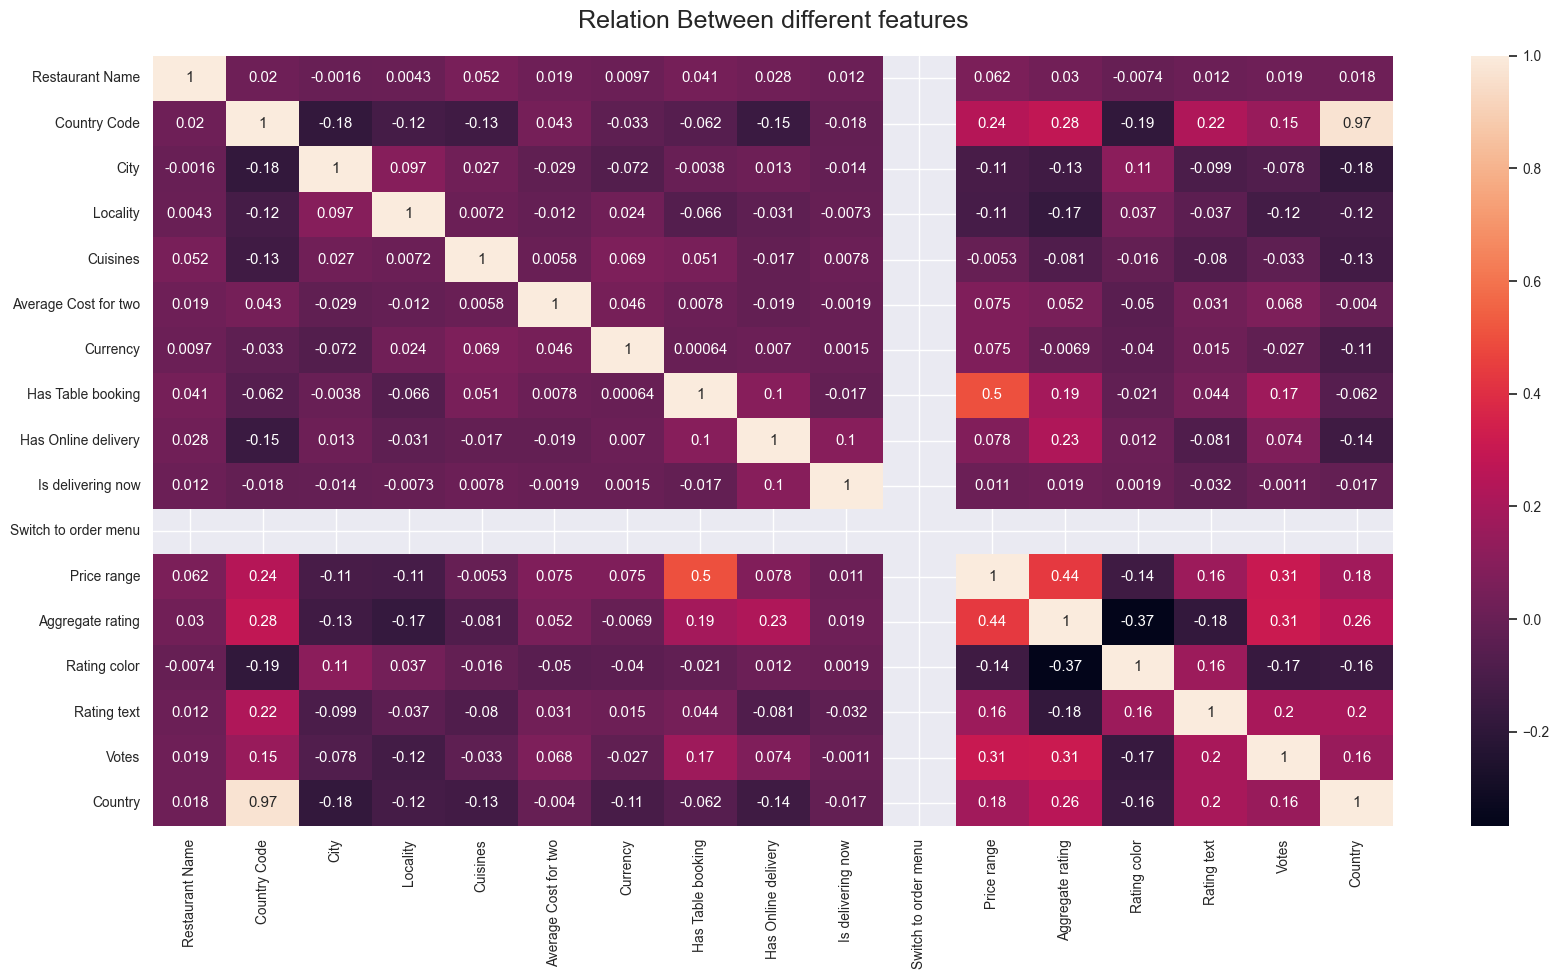

In [93]:
plt.figure(figsize=(20,10))
sns.heatmap(dataset.corr(), annot= True)
plt.title("Relation Between different features", fontsize=18, pad=20)

#### Higher Correlation Coefficient indicates by stronger color intensity, it helps to identify features that are positively and negatively correlated.